<a href="https://colab.research.google.com/github/MicaAle36/recognition-of-emotions/blob/main/Project_One_Emotions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Deep Learning/Emotions/Emotion+AI+Dataset

/content/drive/MyDrive/Deep Learning/Emotions/Emotion+AI+Dataset


In [3]:
import pandas as pd
import numpy as np
import os
import PIL
import seaborn as sns
import pickle
from PIL import *
import cv2
import tensorflow as tf
# from tensorflow import keras
#from tensorflow.keras.applications import DenseNet121
#from tensorflow.keras.models import Model, load_model
#from tensorflow.keras.initializers import glorot_uniform
#from tensorflow.keras.utils import plot_model
#from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
import tensorflow.python
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.applications.resnet50 import ResNet50
#from tensorflow.keras.layers import *
#from tensorflow.keras import backend as K
#from keras import optimizers
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

In [4]:
print(tf.__version__)

2.14.0


In [5]:
#puntos faciales clave
keyfacial_df = pd.read_csv('/content/drive/MyDrive/Deep Learning/Emotions/Emotion+AI+Dataset/Emotion AI Dataset/data.csv')

In [6]:
keyfacial_df['Image'].head()

0    238 236 237 238 240 240 239 241 241 243 240 23...
1    219 215 204 196 204 211 212 200 180 168 178 19...
2    144 142 159 180 188 188 184 180 167 132 84 59 ...
3    193 192 193 194 194 194 193 192 168 111 50 12 ...
4    147 148 160 196 215 214 216 217 219 220 206 18...
Name: Image, dtype: object

In [7]:
#Info sobre el dataset
keyfacial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2140 entries, 0 to 2139
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   left_eye_center_x          2140 non-null   float64
 1   left_eye_center_y          2140 non-null   float64
 2   right_eye_center_x         2140 non-null   float64
 3   right_eye_center_y         2140 non-null   float64
 4   left_eye_inner_corner_x    2140 non-null   float64
 5   left_eye_inner_corner_y    2140 non-null   float64
 6   left_eye_outer_corner_x    2140 non-null   float64
 7   left_eye_outer_corner_y    2140 non-null   float64
 8   right_eye_inner_corner_x   2140 non-null   float64
 9   right_eye_inner_corner_y   2140 non-null   float64
 10  right_eye_outer_corner_x   2140 non-null   float64
 11  right_eye_outer_corner_y   2140 non-null   float64
 12  left_eyebrow_inner_end_x   2140 non-null   float64
 13  left_eyebrow_inner_end_y   2140 non-null   float

In [8]:
# Valores nulos
keyfacial_df.isnull().sum()

left_eye_center_x            0
left_eye_center_y            0
right_eye_center_x           0
right_eye_center_y           0
left_eye_inner_corner_x      0
left_eye_inner_corner_y      0
left_eye_outer_corner_x      0
left_eye_outer_corner_y      0
right_eye_inner_corner_x     0
right_eye_inner_corner_y     0
right_eye_outer_corner_x     0
right_eye_outer_corner_y     0
left_eyebrow_inner_end_x     0
left_eyebrow_inner_end_y     0
left_eyebrow_outer_end_x     0
left_eyebrow_outer_end_y     0
right_eyebrow_inner_end_x    0
right_eyebrow_inner_end_y    0
right_eyebrow_outer_end_x    0
right_eyebrow_outer_end_y    0
nose_tip_x                   0
nose_tip_y                   0
mouth_left_corner_x          0
mouth_left_corner_y          0
mouth_right_corner_x         0
mouth_right_corner_y         0
mouth_center_top_lip_x       0
mouth_center_top_lip_y       0
mouth_center_bottom_lip_x    0
mouth_center_bottom_lip_y    0
Image                        0
dtype: int64

In [9]:
#compruebo el tamaño del df
keyfacial_df['Image'].size

2140

In [10]:
#compruebo las dimensiones del df
keyfacial_df['Image'].ndim

1

In [11]:
#compruebo la forma del df

keyfacial_df['Image'].shape

(2140,)

In [12]:
#separo las imagenes por ' '
#convierto en matriz númerica y 2D
#keyfacial_df['Image'] = keyfacial_df['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep = ' ')
#np.reshape(keyfacial_df['Image'],(96, 96))

keyfacial_df['Image'] = keyfacial_df['Image'].apply(lambda x: np.fromstring(x, dtype = int, sep = ' ').reshape(96, 96))

In [13]:
keyfacial_df.describe()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
count        2140.000000        2140.000000         2140.000000   
mean           66.221549          36.842274           29.640269   
std             2.087683           2.294027            2.051575   
min            47.835757          23.832996           18.922611   
25%            65.046300          35.468842           28.472224   
50%            66.129065          36.913319           29.655440   
75%            67.332093          38.286438           30.858673   
max            78.013082          46.132421           42.495172   

       right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
count         2140.000000              2140.000000              2140.000000   
mean            37.063815                59.272128                37.856014   
std              2.234334                 2.005631                 2.034500   
min             24.773072                41.779381                27.190098   
25%             35.818377                58.113054                36.607950   
50%             37.048085                59.327154                37.845220   
75%             38.333884                60.521492                39.195431   
max             45.980981                69.023030                47.190316   

       left_eye_outer_corner_x  left_eye_outer_corner_y  \
count              2140.000000              2140.000000   
mean                 73.412473                37.640110   
std                   2.701639                 2.684162   
min                  52.947144                26.250023   
25%                  71.741978                36.102409   
50%                  73.240045                37.624207   
75%                  74.978684                39.308331   
max                  87.032252                49.653825   

       right_eye_inner_corner_x  right_eye_inner_corner_y  ...   nose_tip_x  \
count               2140.000000               2140.000000  ...  2140.000000   
mean                  36.603107                 37.920852  ...    47.952141   
std                    1.822784                  2.009505  ...     3.276053   
min                   24.112624                 26.250023  ...    24.472590   
25%                   35.495730                 36.766783  ...    46.495330   
50%                   36.620735                 37.920336  ...    47.900511   
75%                   37.665280                 39.143921  ...    49.260657   
max                   47.293746                 44.887301  ...    65.279654   

        nose_tip_y  mouth_left_corner_x  mouth_left_corner_y  \
count  2140.000000          2140.000000          2140.000000   
mean     57.253926            63.419076            75.887660   
std       4.528635             3.650131             4.438565   
min      41.558400            43.869480            57.023258   
25%      54.466000            61.341291            72.874263   
50%      57.638582            63.199057            75.682465   
75%      60.303524            65.302398            78.774969   
max      75.992731            84.767123            94.673637   

       mouth_right_corner_x  mouth_right_corner_y  mouth_center_top_lip_x  \
count           2140.000000           2140.000000             2140.000000   
mean              32.967365             76.134065               48.081325   
std                3.595103              4.259514                2.723274   
min                9.778137             56.690208               32.260312   
25%               30.879288             73.280038               46.580004   
50%               33.034022             75.941985               47.939031   
75%               35.063575             78.884031               49.290000   
max               50.973348             93.443176               61.804506   

       mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
count             2140.000000                2140.000000   
mean                72.681125                  48.149654

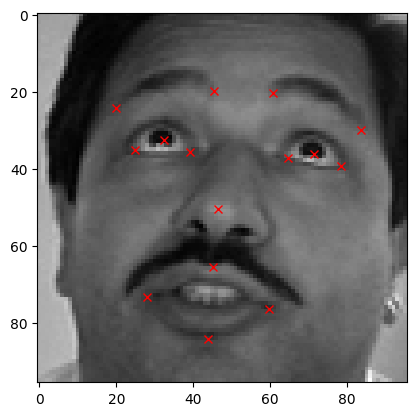

In [14]:
i = np.random.randint(1, len(keyfacial_df))
plt.imshow(keyfacial_df['Image'][i], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')


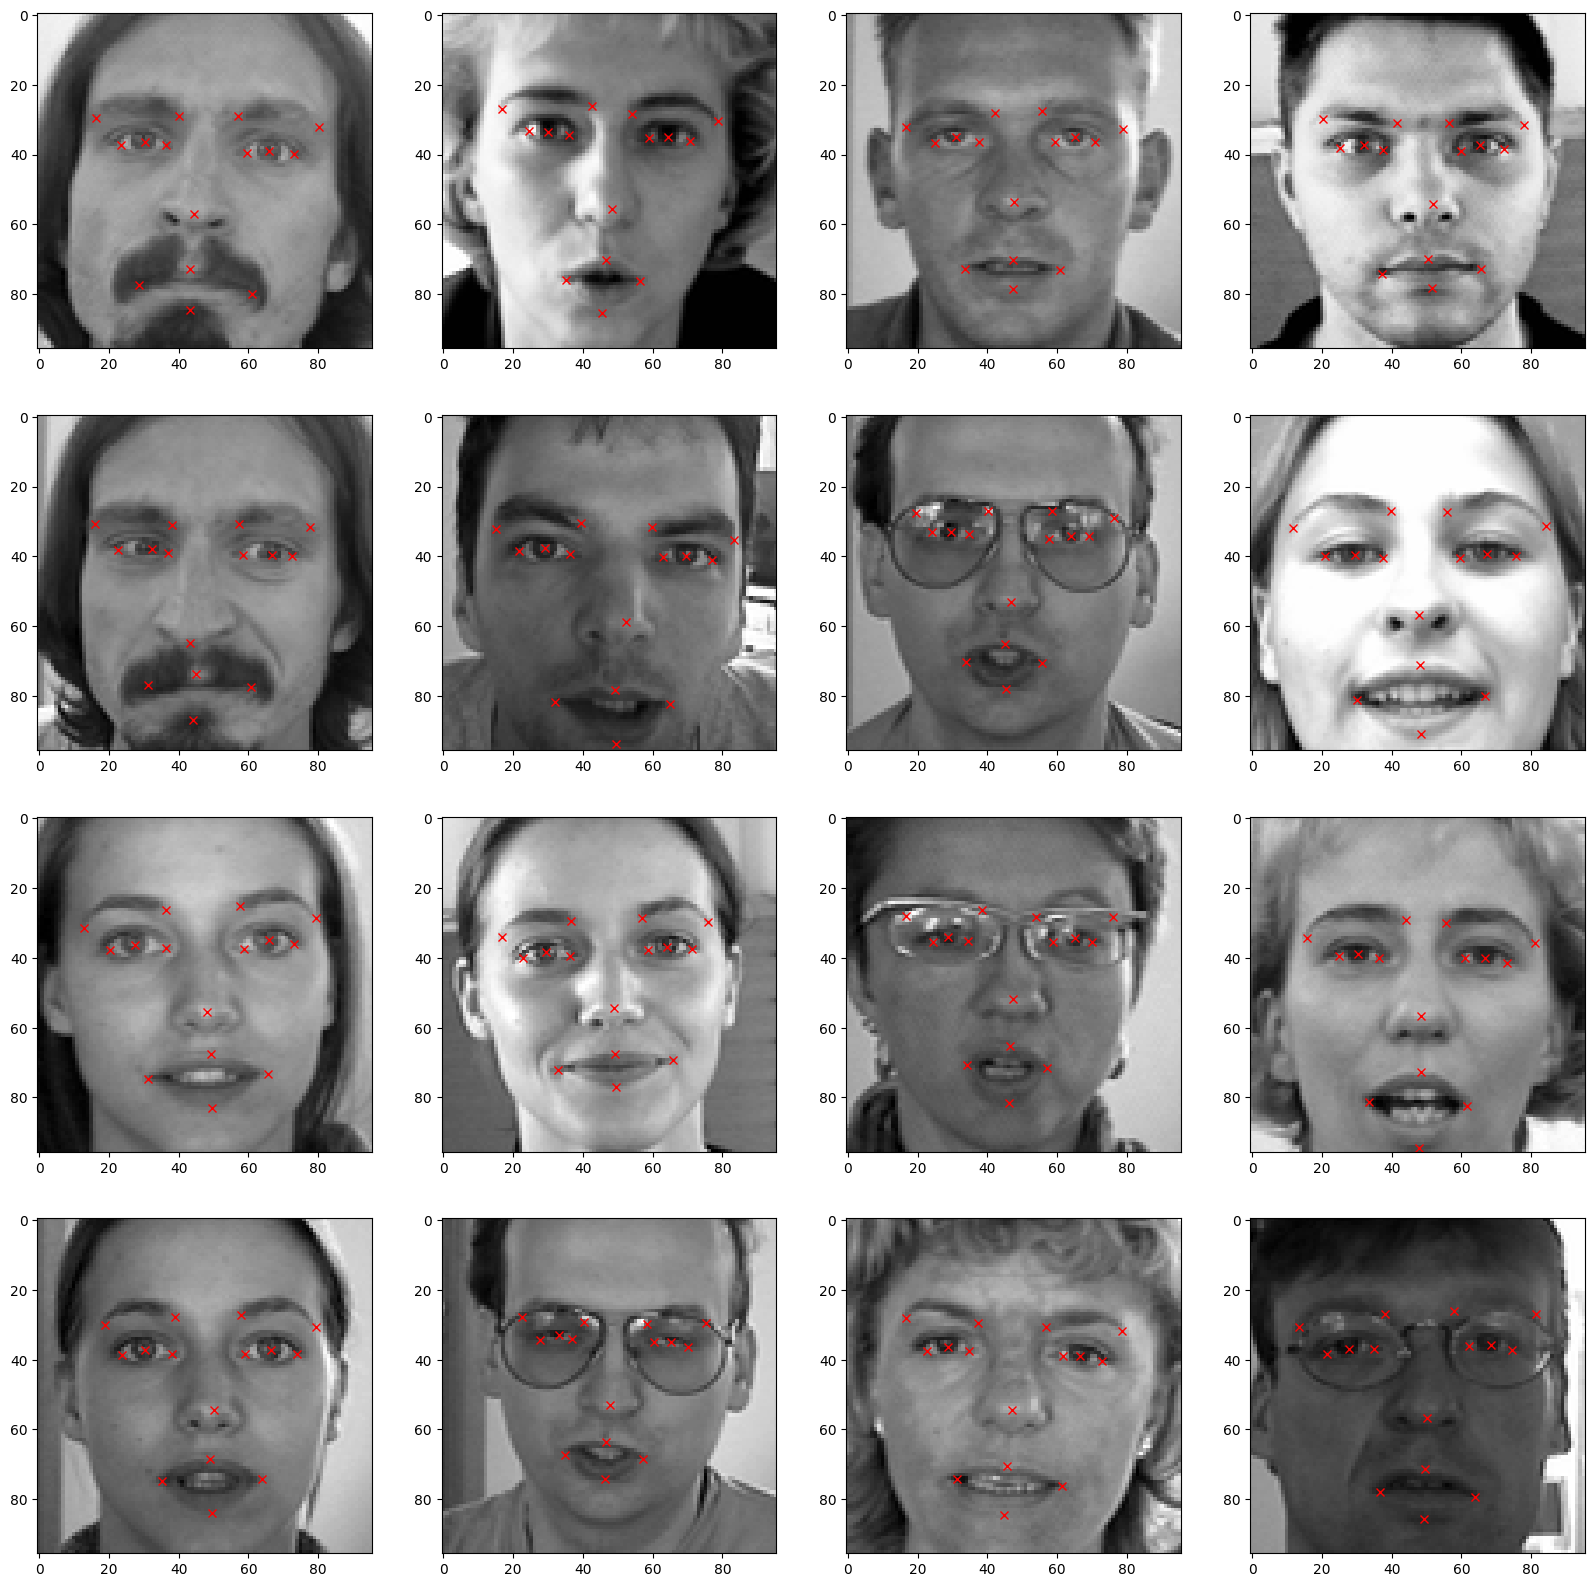

In [15]:
fig = plt.figure(figsize=(20, 20))

for i in range(16):
    ax = fig.add_subplot(4, 4, i + 1)
    image = plt.imshow(keyfacial_df['Image'][i],cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')

Realizo una verificación adicional en los datos visualizando aleatoriamente 64 nuevas imágenes junto con sus puntos clave correspondientes

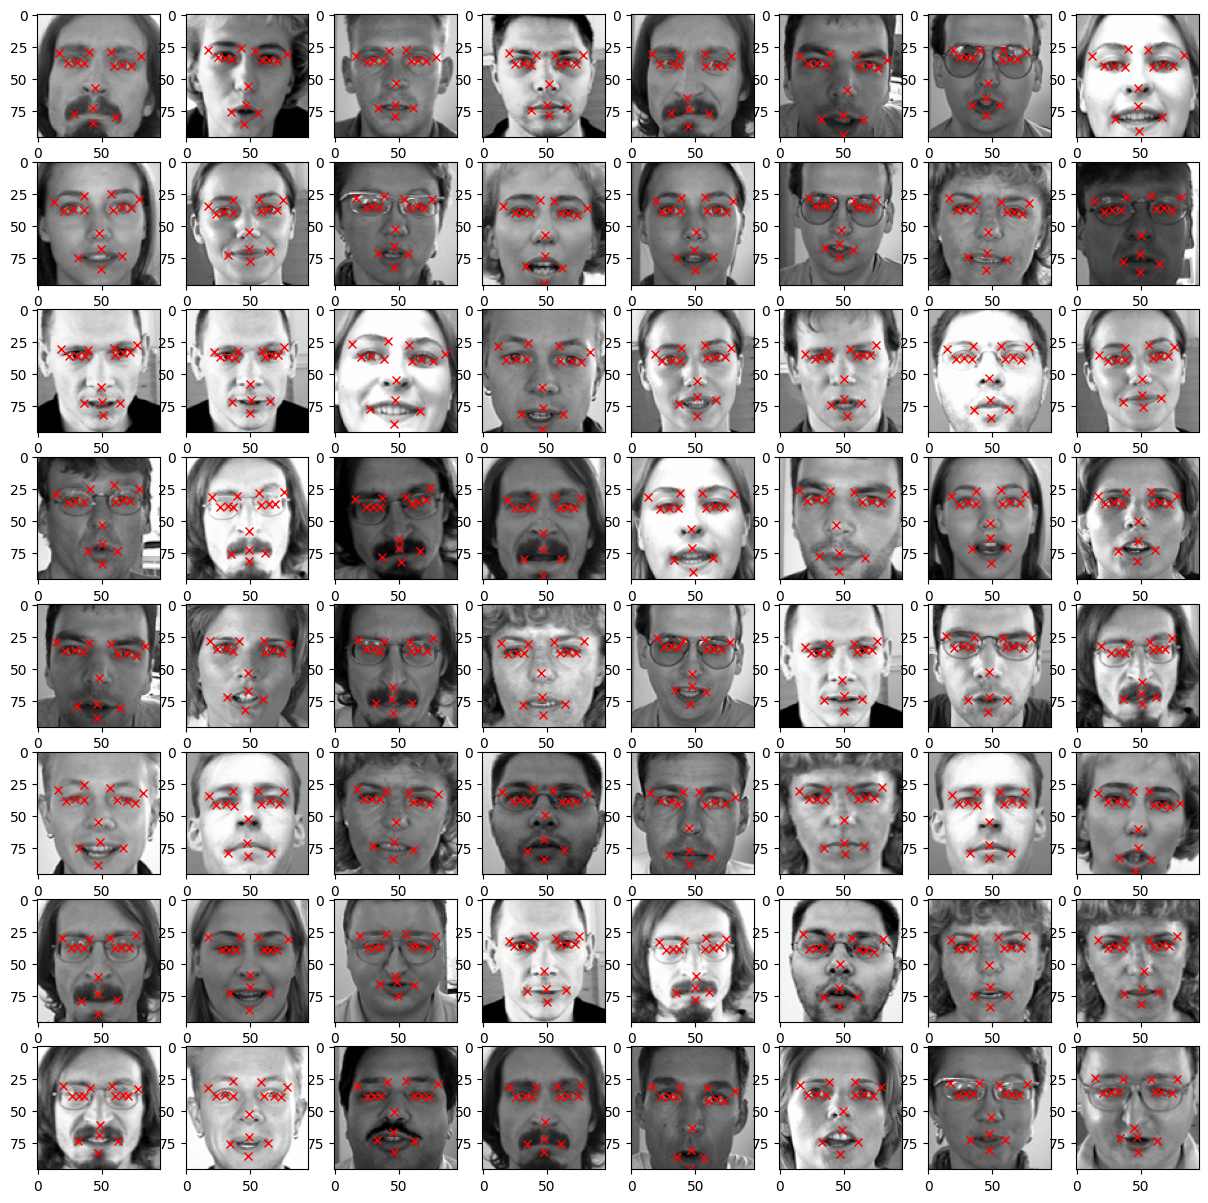

In [16]:
fig1 = plt.figure(figsize=(15, 15))
for i in range(64):
    ax = fig1.add_subplot(8, 8, i + 1)
    image = plt.imshow(keyfacial_df['Image'][i],cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[i][j-1], keyfacial_df.loc[i][j], 'rx')

In [17]:
import copy
keyfacial_df_copy = copy.copy(keyfacial_df)

columns = keyfacial_df_copy.columns[:-1]
columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y'],
      dtype='object')

In [18]:
# Horizontal Flip - Doy la vuelta a las imágenes entorno al eje y
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis = 1))

#dado que estoy volteando horizontalmente, los valores de las coordenadas y serían los mismos
# Solo cambiarían los valores de la coordenada x, todo lo que tengo que hacer es restar los valores iniciales de la coordenada x del ancho de la imagen (96)
for i in range(len(columns)):
  if i%2 == 0:
    keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x) )



In [19]:
keyfacial_df_copy['Image']= keyfacial_df_copy['Image'].apply(lambda y: np.flipud(y))# o con np.flip(y  axis=0)

In [20]:
for j in range(len(columns)):
   if j%2 != 0:
     keyfacial_df_copy[columns[j]] = keyfacial_df_copy[columns[j]].apply(lambda y: 96. - float(y))


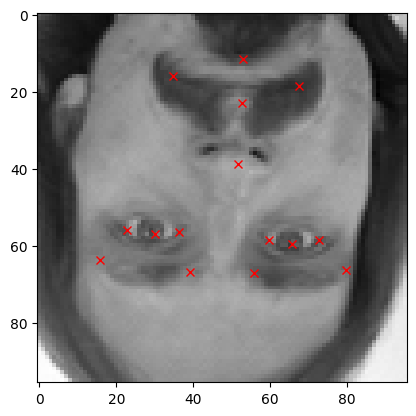

In [21]:
plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1, 31, 2):
  plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

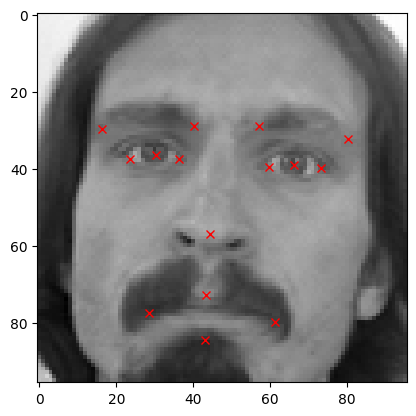

In [22]:

plt.imshow(keyfacial_df['Image'][0], cmap = 'gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df.loc[0][j-1], keyfacial_df.loc[0][j], 'rx')

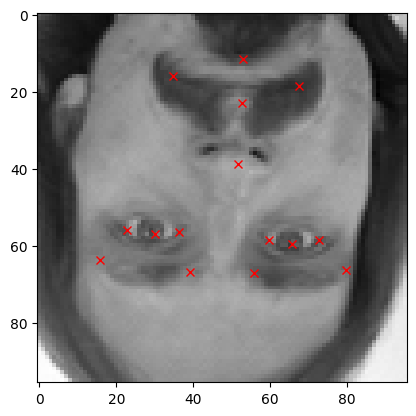

In [23]:
plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

In [24]:
# Concateno el dataset original con el dataframe aumentado
augmented_df = np.concatenate((keyfacial_df, keyfacial_df_copy))
augmented_df.shape

(4280, 31)

In [25]:
# Aumento aleatoriamente el brillo de las imágenes
# Multiplico los valores de los píxeles por valores aleatorios entre 1,5 y 2 para aumentar el brillo de la imagen
# Recorto el valor entre 0 y 255

import random

keyfacial_df_copy = copy.copy(keyfacial_df)
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.clip(random.uniform(1.5, 2)* x, 0.0, 255.0))
augmented_df = np.concatenate((augmented_df, keyfacial_df_copy))
augmented_df.shape

(6420, 31)

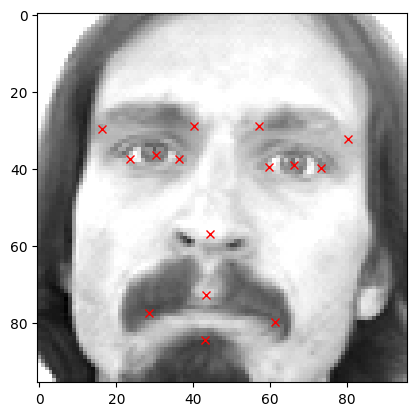

In [26]:
plt.imshow(keyfacial_df_copy['Image'][0], cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

NORMALIZACIÓN DE LOS DATOS Y PREPARACIÓN PARA EL ENTRENAMIENTO


In [27]:
# Obtengo el valor de las imágenes que está presente en la columna 31
img = augmented_df[:,30]

# Normalizo las imágenes (en rango de color 1 pixel = negro, 255 pixeles = blanco... el tamaño max.)
img = img/255.

# Creo un array vacío de tamaño (x, 96, 96, 1) para subministrar al modelo
X = np.empty((len(img), 96, 96, 1))

# Itero sobre la lista de imágenes y añado las mismas al array vacío tras expandir su dimensión de (96, 96) a (96, 96, 1)
for i in range(len(img)):
  X[i,] = np.expand_dims(img[i], axis = 2)

# Convierto el tipo array a float32
X = np.asarray(X).astype(np.float32)
X.shape

(6420, 96, 96, 1)

In [28]:
# Obtengo el valor de las coordenadas x & y que se utilizarán como target.
y = augmented_df[:,:30]
y = np.asarray(y).astype(np.float32)
y.shape

(6420, 30)

In [29]:
# Divido los datos en entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [30]:
def res_block(X, filter, stage):

  # Bloque Convolucional
  X_copy = X

  f1 , f2, f3 = filter

  # Camino Principal
  X = tf.keras.layers.Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_conv_a', kernel_initializer= tf.keras.initializers.GlorotUniform(seed = 0))(X)
  X = tf.keras.layers.MaxPooling2D((2,2))(X)
  X = tf.keras.layers.BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_a')(X)
  X = tf.keras.layers.Activation('relu')(X)

  X = tf.keras.layers.Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_conv_b', kernel_initializer= tf.keras.initializers.GlorotUniform(seed = 0))(X)
  X = tf.keras.layers.BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_b')(X)
  X = tf.keras.layers.Activation('relu')(X)

  X = tf.keras.layers.Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_c', kernel_initializer= tf.keras.initializers.GlorotUniform(seed = 0))(X)
  X = tf.keras.layers.BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_c')(X)


  # Camino Corto
  X_copy = tf.keras.layers.Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_conv_copy', kernel_initializer= tf.keras.initializers.GlorotUniform(seed = 0))(X_copy)
  X_copy = tf.keras.layers.MaxPooling2D((2,2))(X_copy)
  X_copy = tf.keras.layers.BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_conv_copy')(X_copy)

  # Añadir
  X = tf.keras.layers.Add()([X,X_copy])
  X = tf.keras.layers.Activation('relu')(X)

  # Bloque de Identidad 1
  X_copy = X


  # Camino Principal
  X = tf.keras.layers.Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_1_a', kernel_initializer= tf.keras.initializers.GlorotUniform(seed = 0))(X)
  X = tf.keras.layers.BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_a')(X)
  X = tf.keras.layers.Activation('relu')(X)

  X = tf.keras.layers.Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_1_b', kernel_initializer= tf.keras.initializers.GlorotUniform(seed = 0))(X)
  X = tf.keras.layers.BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_b')(X)
  X = tf.keras.layers.Activation('relu')(X)

  X = tf.keras.layers.Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_1_c', kernel_initializer= tf.keras.initializers.GlorotUniform(seed = 0))(X)
  X = tf.keras.layers.BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_1_c')(X)

  # Añadir
  X = tf.keras.layers.Add()([X,X_copy])
  X = tf.keras.layers.Activation('relu')(X)

  # Bloque de Identidad 2
  X_copy = X


  # Camino Principal
  X = tf.keras.layers.Conv2D(f1, (1,1),strides = (1,1), name ='res_'+str(stage)+'_identity_2_a', kernel_initializer= tf.keras.initializers.GlorotUniform(seed = 0))(X)
  X = tf.keras.layers.BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_a')(X)
  X = tf.keras.layers.Activation('relu')(X)

  X = tf.keras.layers.Conv2D(f2, kernel_size = (3,3), strides =(1,1), padding = 'same', name ='res_'+str(stage)+'_identity_2_b', kernel_initializer= tf.keras.initializers.GlorotUniform(seed = 0))(X)
  X = tf.keras.layers.BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_b')(X)
  X = tf.keras.layers.Activation('relu')(X)

  X = tf.keras.layers.Conv2D(f3, kernel_size = (1,1), strides =(1,1),name ='res_'+str(stage)+'_identity_2_c', kernel_initializer= tf.keras.initializers.GlorotUniform(seed = 0))(X)
  X = tf.keras.layers.BatchNormalization(axis =3, name = 'bn_'+str(stage)+'_identity_2_c')(X)

  # Añadir
  X = tf.keras.layers.Add()([X,X_copy])
  X = tf.keras.layers.Activation('relu')(X)

  return X

In [31]:
input_shape = (96, 96, 1)

# Tamaño del tensor de entrada
X_input = tf.keras.Input(input_shape)

# Zero-padding
X = tf.keras.layers.ZeroPadding2D((3,3))(X_input)

# 1 - Fase
X = tf.keras.layers.Conv2D(64, (7,7), strides= (2,2), name = 'conv1', kernel_initializer= tf.keras.initializers.GlorotUniform(seed = 0))(X)
X = tf.keras.layers.BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = tf.keras.layers.Activation('relu')(X)
X = tf.keras.layers.MaxPooling2D((3,3), strides= (2,2))(X)

# 2 - Fase
X = res_block(X, filter= [64,64,256], stage= 2)

# 3 - Fase
X = res_block(X, filter= [128,128,512], stage= 3)

# 4 - Fase
X = res_block(X, filter= [256,256,1024], stage= 4)

# Average Pooling
X = tf.keras.layers.AveragePooling2D((2,2), name = 'Averagea_Pooling')(X)

# Capa Final
X = tf.keras.layers.Flatten()(X)
X = tf.keras.layers.Dense(4096, activation = 'relu')(X)
X = tf.keras.layers.Dropout(0.2)(X)
X = tf.keras.layers.Dense(2048, activation = 'relu')(X)
X = tf.keras.layers.Dropout(0.1)(X)
X = tf.keras.layers.Dense(30, activation = 'relu')(X)


model_1_facialKeyPoints = tf.keras.Model( inputs= X_input, outputs = X)
model_1_facialKeyPoints.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 96, 96, 1)]          0         []                            
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 102, 102, 1)          0         ['input_1[0][0]']             
 g2D)                                                                                             
                                                                                                  
 conv1 (Conv2D)              (None, 48, 48, 64)           3200      ['zero_padding2d[0][0]']      
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 48, 48, 64)           256       ['conv1[0][0]']           

In [32]:
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad = False)
model_1_facialKeyPoints.compile(loss = "mean_squared_error", optimizer = 'adam', metrics = ['accuracy'])

In [33]:
# Guardo el mejor modelo con mejor error de validación
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = "/content/drive/MyDrive/Deep Learning/Emotions/Emotion+AI+Dataset/FacialKeyPoints_weights.hdf5", verbose = 1,
                               save_best_only = True,  save_weights_only=True)
# necesario añadir  save_weights_only=True en las nuevas versiones de Python

In [34]:
history = model_1_facialKeyPoints.fit(X_train, y_train, batch_size = 32,
                                      epochs = 2, validation_split = 0.05, callbacks=[checkpointer])

Epoch 1/2
153/153 [==============================] - ETA: 0s - loss: 178.9028 - accuracy: 0.5794
Epoch 1: val_loss improved from inf to 579.92560, saving model to /content/drive/MyDrive/Deep Learning/Emotions/Emotion+AI+Dataset/FacialKeyPoints_weights.hdf5
153/153 [==============================] - 318s 2s/step - loss: 178.9028 - accuracy: 0.5794 - val_loss: 579.9256 - val_accuracy: 0.7899
Epoch 2/2
153/153 [==============================] - ETA: 0s - loss: 25.2800 - accuracy: 0.7499
Epoch 2: val_loss improved from 579.92560 to 135.54396, saving model to /content/drive/MyDrive/Deep Learning/Emotions/Emotion+AI+Dataset/FacialKeyPoints_weights.hdf5
153/153 [==============================] - 307s 2s/step - loss: 25.2800 - accuracy: 0.7499 - val_loss: 135.5440 - val_accuracy: 0.6926


In [35]:
# Guardo la arquitectura del modelo en un JSON para luego usarlo

model_json = model_1_facialKeyPoints.to_json()
with open("/content/drive/MyDrive/Deep Learning/Emotions/Emotion+AI+Dataset/FacialKeyPoints-model.json","w") as json_file:
  json_file.write(model_json)


In [36]:
with open('/content/drive/MyDrive/Deep Learning/Emotions/Emotion+AI+Dataset/Emotion AI Dataset/detection.json', 'r') as json_file:
    json_savedModel= json_file.read()

# Cargar la arquitectura del modelo
model_1_facialKeyPoints = tf.keras.models.model_from_json(json_savedModel)
model_1_facialKeyPoints.load_weights('/content/drive/MyDrive/Deep Learning/Emotions/Emotion+AI+Dataset/Emotion AI Dataset/weights_keypoint.hdf5')
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1=0.9, beta_2=0.999, amsgrad=False)
model_1_facialKeyPoints.compile(loss="mean_squared_error", optimizer= adam , metrics = ['accuracy'])

In [37]:
# Evaluar el modelo

result = model_1_facialKeyPoints.evaluate(X_test, y_test)
print("Accuracy : {}".format(result[1]))

41/41 [==============================] - 9s 204ms/step - loss: 312.1424 - accuracy: 0.5935
Accuracy : 0.5934579372406006


In [38]:
# Obtengo las claves del modelo
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

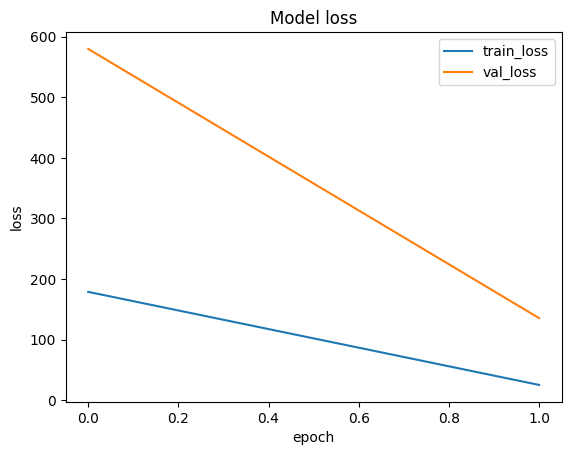

In [39]:
# Represento los scores del entrenamiento

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss','val_loss'], loc = 'upper right')
plt.show()

expresiones faciales

In [40]:
# Leo el CSV para los datos de expresiones faciales
facialexpression_df = pd.read_csv('/content/drive/MyDrive/Deep Learning/Emotions/Emotion+AI+Dataset/Emotion AI Dataset/icml_face_data.csv')

In [41]:
facialexpression_df

emotion                                             pixels
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1            0  151 150 147 155 148 133 111 140 170 174 182 15...
2            2  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
3            2  20 17 19 21 25 38 42 42 46 54 56 62 63 66 82 1...
4            3  77 78 79 79 78 75 60 55 47 48 58 73 77 79 57 5...
...        ...                                                ...
24563        3  0 39 81 80 104 97 51 64 68 46 41 67 53 68 70 5...
24564        0  181 177 176 156 178 144 136 132 122 107 131 16...
24565        3  178 174 172 173 181 188 191 194 196 199 200 20...
24566        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...
24567        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...

[24568 rows x 2 columns]

In [42]:
facialexpression_df[' pixels'][0] # Formato String

'70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197 201 137 58 98 92

In [43]:
# Función para convertir valores de píxel de formato string a formato array

def string2array(x):
  return np.array(x.split(' ')).reshape(48, 48, 1).astype('float32')

In [44]:
# Redimensiono la imagen de (48, 48) a (96, 96)

def resize(x):

  img = x.reshape(48, 48)
  return cv2.resize(img, dsize=(96, 96), interpolation = cv2.INTER_CUBIC)

In [45]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: string2array(x))

In [46]:
facialexpression_df[' pixels'] = facialexpression_df[' pixels'].apply(lambda x: resize(x))

In [47]:
facialexpression_df.head()

emotion                                             pixels
0        0  [[69.316925, 73.03865, 79.13719, 84.17186, 85....
1        0  [[151.09435, 150.91393, 150.65791, 148.96367, ...
2        2  [[23.061905, 25.50914, 29.47847, 33.99843, 36....
3        2  [[20.083221, 19.079437, 17.398712, 17.158691, ...
4        3  [[76.26172, 76.54747, 77.001785, 77.7672, 78.4...

In [48]:
# Compruebo la estructura del data frame
facialexpression_df.shape

(24568, 2)

In [49]:
# Miro si hay valores nulos en el data frame
facialexpression_df.isnull().sum()

emotion    0
 pixels    0
dtype: int64

In [50]:
label_to_text = {0:'Ira', 1:'Odio', 2:'Tristeza', 3:'Felicidad', 4: 'Sorpresa'}

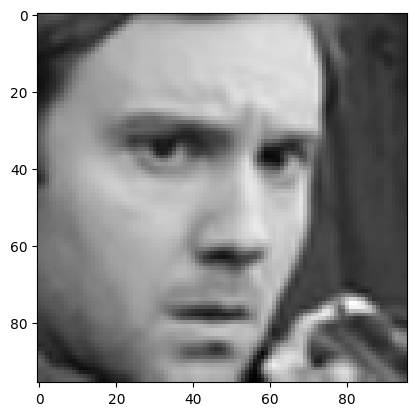

In [51]:
plt.imshow(facialexpression_df[' pixels'][0], cmap = 'gray')

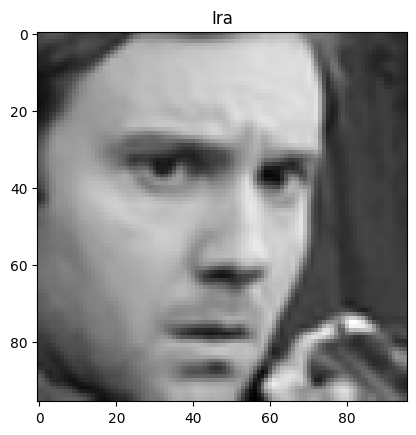

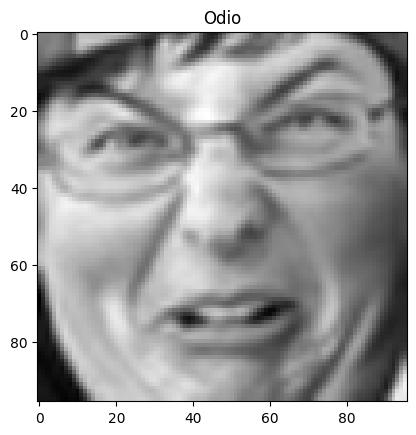

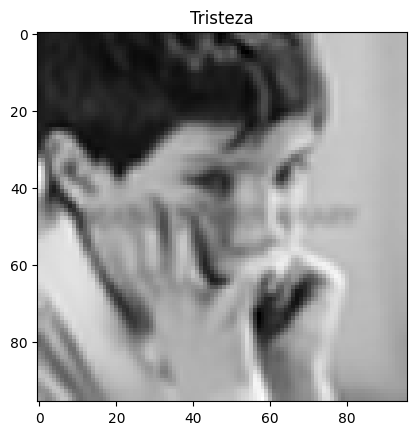

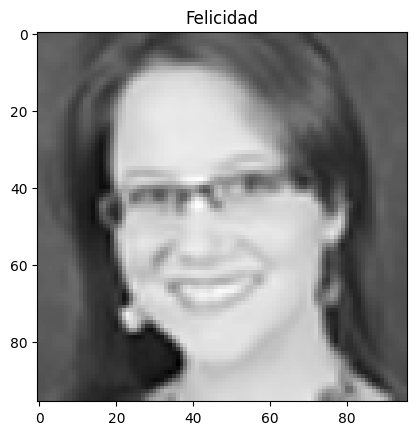

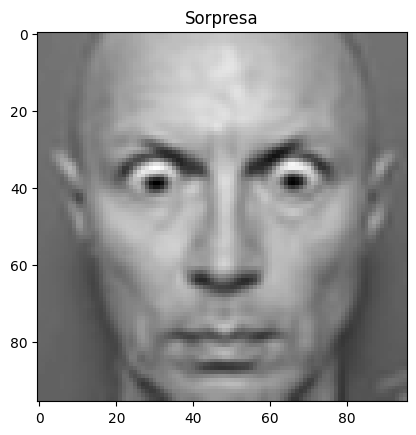

In [52]:
emotions = [0, 1, 2, 3, 4]

for i in emotions:
  data = facialexpression_df[facialexpression_df['emotion'] == i][:1]
  img = data[' pixels'].item()
  img = img.reshape(96, 96)
  plt.figure()
  plt.title(label_to_text[i])
  plt.imshow(img, cmap = 'gray')

In [53]:
facialexpression_df.emotion.value_counts().index

Int64Index([3, 2, 0, 4, 1], dtype='int64')

In [54]:
facialexpression_df.emotion.value_counts()

3    8989
2    6077
0    4953
4    4002
1     547
Name: emotion, dtype: int64

<Axes: ylabel='emotion'>

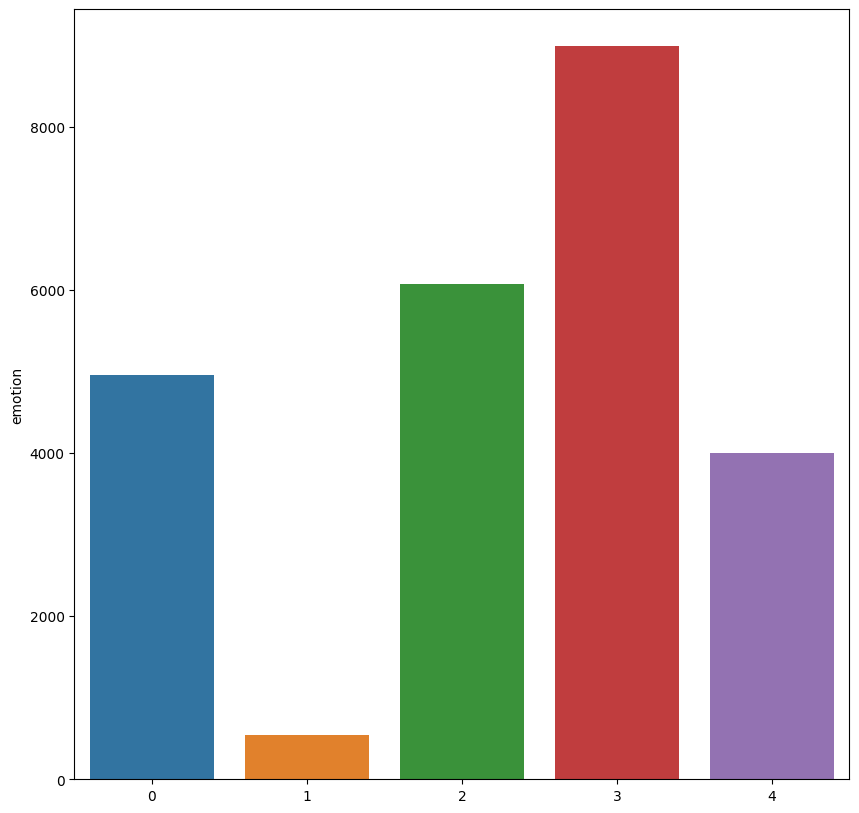

In [55]:
plt.figure(figsize = (10,10))
sns.barplot(x = facialexpression_df.emotion.value_counts().index, y = facialexpression_df.emotion.value_counts())

In [56]:
# Divido el dataframe en características y etiquetas para la clasificación
X = facialexpression_df[' pixels']
y = tf.keras.utils.to_categorical(facialexpression_df['emotion'])


In [57]:
X[0]

array([[ 69.316925,  73.03865 ,  79.13719 , ...,  40.73619 ,  40.6584  ,
         40.5394  ],
       [ 68.66325 ,  70.95224 ,  74.71768 , ...,  43.274765,  42.037186,
         41.223618],
       [ 67.768814,  67.71646 ,  67.67172 , ...,  47.39473 ,  44.26329 ,
         42.31465 ],
       ...,
       [ 74.89021 ,  76.79553 ,  79.90259 , ...,  71.463425,  59.32875 ,
         51.74736 ],
       [ 76.68126 ,  75.808105,  74.25452 , ...,  93.943375,  79.77934 ,
         71.13246 ],
       [ 77.63858 ,  75.15074 ,  70.8846  , ..., 107.66351 ,  92.23212 ,
         82.91585 ]], dtype=float32)

In [58]:
X.shape

(24568,)

In [59]:
X = np.stack(X, axis = 0)
X = X.reshape(24568, 96, 96, 1)

print(X.shape, y.shape)

(24568, 96, 96, 1) (24568, 5)


In [60]:
#Divido el dataframe en conjunto de entrenamiento, test y validación

from sklearn.model_selection import train_test_split

X_train, X_Test, y_train, y_Test = train_test_split(X, y, test_size = 0.1, shuffle = True)
X_val, X_Test, y_val, y_Test = train_test_split(X_Test, y_Test, test_size = 0.5, shuffle = True)


In [61]:
print(X_val.shape, y_val.shape)

(1228, 96, 96, 1) (1228, 5)


In [62]:
print(X_Test.shape, y_Test.shape)

(1229, 96, 96, 1) (1229, 5)


In [63]:
print(X_train.shape, y_train.shape)

(22111, 96, 96, 1) (22111, 5)


In [64]:
# Pre Procesado de Imágenes

X_train = X_train/255
X_val   = X_val /255
X_Test  = X_Test/255

In [65]:
X_train

array([[[[0.56835467],
         [0.5273303 ],
         [0.45844182],
         ...,
         [0.7500577 ],
         [0.73008937],
         [0.71775895]],

        [[0.45761335],
         [0.428979  ],
         [0.38044193],
         ...,
         [0.7479349 ],
         [0.7290331 ],
         [0.71734816]],

        [[0.27180943],
         [0.26412424],
         [0.24997462],
         ...,
         [0.74485964],
         [0.72758836],
         [0.7168892 ]],

        ...,

        [[0.7845939 ],
         [0.82183224],
         [0.8864248 ],
         ...,
         [0.286473  ],
         [0.2865679 ],
         [0.28671587]],

        [[0.80755913],
         [0.8127431 ],
         [0.8216211 ],
         ...,
         [0.26478145],
         [0.2663357 ],
         [0.2673067 ]],

        [[0.8206511 ],
         [0.807494  ],
         [0.7843984 ],
         ...,
         [0.25161725],
         [0.2540753 ],
         [0.25555834]]],


       [[[0.6702448 ],
         [0.64398664],
         [0.60

In [66]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    brightness_range = [1.1, 1.5],
    fill_mode = "nearest")

In [67]:
input_shape = (96, 96, 1)

# Tamaño del tensor de entrada
X_input = tf.keras.Input(input_shape)

# Zero-padding
X = tf.keras.layers.ZeroPadding2D((3, 3))(X_input)

# 1 - Fase
X = tf.keras.layers.Conv2D(64, (7, 7), strides= (2, 2), name = 'conv1', kernel_initializer= tf.keras.initializers.GlorotUniform(seed = 0))(X)
X = tf.keras.layers.BatchNormalization(axis =3, name = 'bn_conv1')(X)
X = tf.keras.layers.Activation('relu')(X)
X = tf.keras.layers.MaxPooling2D((3, 3), strides= (2, 2))(X)

# 2 - Fase
X = res_block(X, filter= [64, 64, 256], stage= 2)

# 3 - Fase
X = res_block(X, filter= [128, 128, 512], stage= 3)

# 4 - Fase
#X =res_block(X, filter= [256, 256, 1024], stage= 4)

# Average Pooling
X = tf.keras.layers.AveragePooling2D((4, 4), name = 'Averagea_Pooling')(X)

# Capa Final
X = tf.keras.layers.Flatten()(X)
X = tf.keras.layers.Dense(5, activation = 'softmax', name = 'Dense_final', kernel_initializer= tf.keras.initializers.GlorotUniform(seed=0))(X)

model_2_emotion = tf.keras.Model(inputs= X_input, outputs = X, name = 'Resnet18')

model_2_emotion.summary()

Model: "Resnet18"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 96, 96, 1)]          0         []                            
                                                                                                  
 zero_padding2d_1 (ZeroPadd  (None, 102, 102, 1)          0         ['input_2[0][0]']             
 ing2D)                                                                                           
                                                                                                  
 conv1 (Conv2D)              (None, 48, 48, 64)           3200      ['zero_padding2d_1[0][0]']    
                                                                                                  
 bn_conv1 (BatchNormalizati  (None, 48, 48, 64)           256       ['conv1[0][0]']        

In [68]:
# Entrenar la red
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [69]:
# El primer modelo de puntos faciales clave se guardó con: FacialKeyPoints_weights.hdf5 and FacialKeyPoints-model.json

# Uso la parada temprana para salir del entenamiento si el error de validación
# no decrece después de cierto número de epochs
earlystopping = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 20)

# Guardo el mejor modelo con menor error de validación
checkpointer = tf.keras.callbacks.ModelCheckpoint(filepath = "/content/drive/MyDrive/Deep Learning/Emotions/Emotion+AI+Dataset/FacialExpression_weights.hdf5", verbose = 1,
                               save_best_only=True)

In [70]:
history = model_2_emotion.fit(train_datagen.flow(X_train, y_train, batch_size=64),
	validation_data=(X_val, y_val), steps_per_epoch=len(X_train) // 64,
	epochs= 2, callbacks=[ checkpointer, earlystopping])

Epoch 1/2
345/345 [==============================] - ETA: 0s - loss: 1.5106 - accuracy: 0.3596
Epoch 1: val_loss improved from inf to 1.50260, saving model to /content/drive/MyDrive/Deep Learning/Emotions/Emotion+AI+Dataset/FacialExpression_weights.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


345/345 [==============================] - 482s 1s/step - loss: 1.5106 - accuracy: 0.3596 - val_loss: 1.5026 - val_accuracy: 0.3502
Epoch 2/2
345/345 [==============================] - ETA: 0s - loss: 1.3664 - accuracy: 0.4062
Epoch 2: val_loss improved from 1.50260 to 1.30461, saving model to /content/drive/MyDrive/Deep Learning/Emotions/Emotion+AI+Dataset/FacialExpression_weights.hdf5
345/345 [==============================] - 460s 1s/step - loss: 1.3664 - accuracy: 0.4062 - val_loss: 1.3046 - val_accuracy: 0.4365


In [71]:
# Guardo la arquitectura del modelo en un JSON para su futuro uso

model_json = model_2_emotion.to_json()
with open("/content/drive/MyDrive/Deep Learning/Emotions/Emotion+AI+Dataset/FacialExpression-model.json","w") as json_file:
  json_file.write(model_json)

In [72]:
with open('/content/drive/MyDrive/Deep Learning/Emotions/Emotion+AI+Dataset/Emotion AI Dataset/emotion.json', 'r') as json_file:
    json_savedModel= json_file.read()

# Cargo la arquitectura del modelo
model_2_emotion = tf.keras.models.model_from_json(json_savedModel)
model_2_emotion.load_weights('/content/drive/MyDrive/Deep Learning/Emotions/Emotion+AI+Dataset/Emotion AI Dataset/weights_emotions.hdf5')
model_2_emotion.compile(optimizer = "Adam", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [73]:
score = model_2_emotion.evaluate(X_Test, y_Test)
print('Accuracy en la fase de Test: {}'.format(score[1]))

39/39 [==============================] - 6s 120ms/step - loss: 0.3750 - accuracy: 0.8560
Accuracy en la fase de Test: 0.8559804558753967


In [74]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [75]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

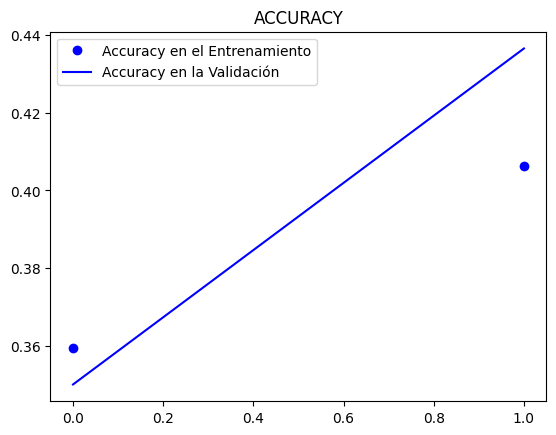

In [76]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Accuracy en el Entrenamiento')
plt.plot(epochs, val_accuracy, 'b', label='Accuracy en la Validación')
plt.title('ACCURACY')
plt.legend()

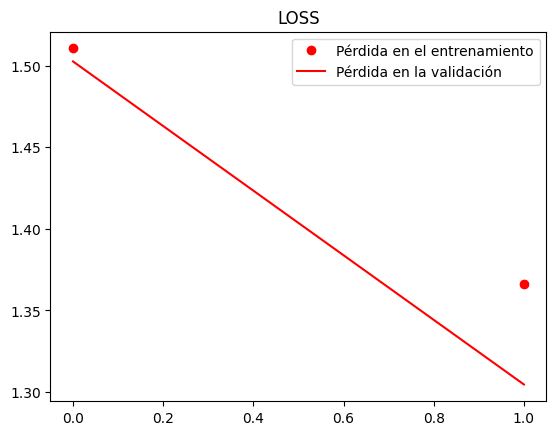

In [77]:
plt.plot(epochs, loss, 'ro', label='Pérdida en el entrenamiento')
plt.plot(epochs, val_loss, 'r', label='Pérdida en la validación')
plt.title('LOSS')
plt.legend()

In [78]:
# predicted_classes = model.predict_classes(X_test)
predicted_classes = np.argmax(model_2_emotion.predict(X_Test), axis=-1)
y_true = np.argmax(y_Test, axis=-1)

39/39 [==============================] - 6s 152ms/step


In [79]:
y_true.shape

(1229,)

<Axes: >

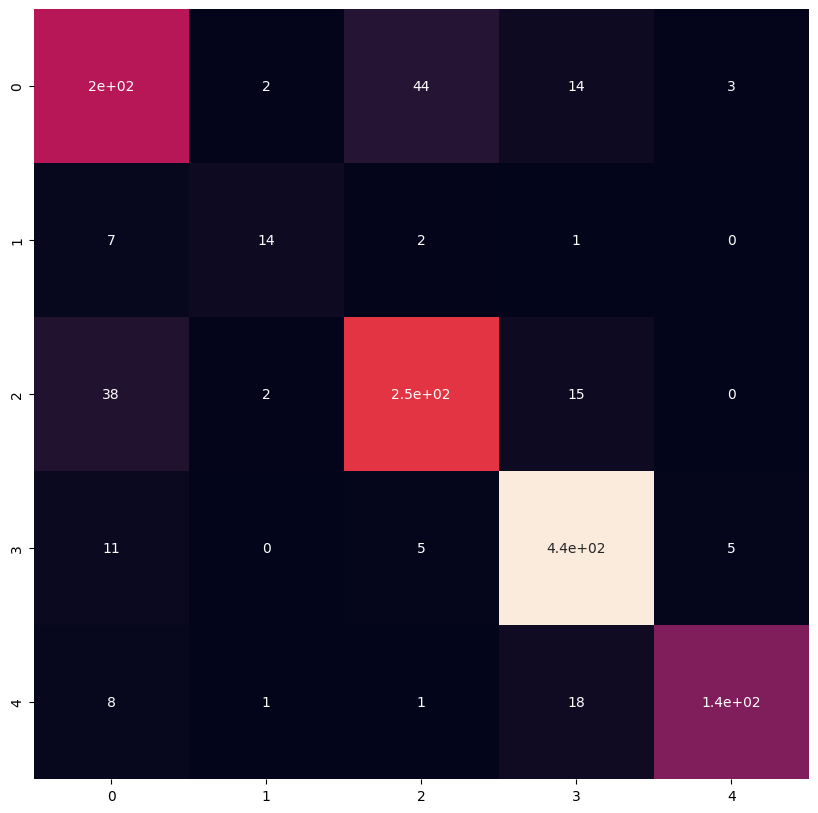

In [80]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (10, 10))
sns.heatmap(cm, annot = True, cbar = False)

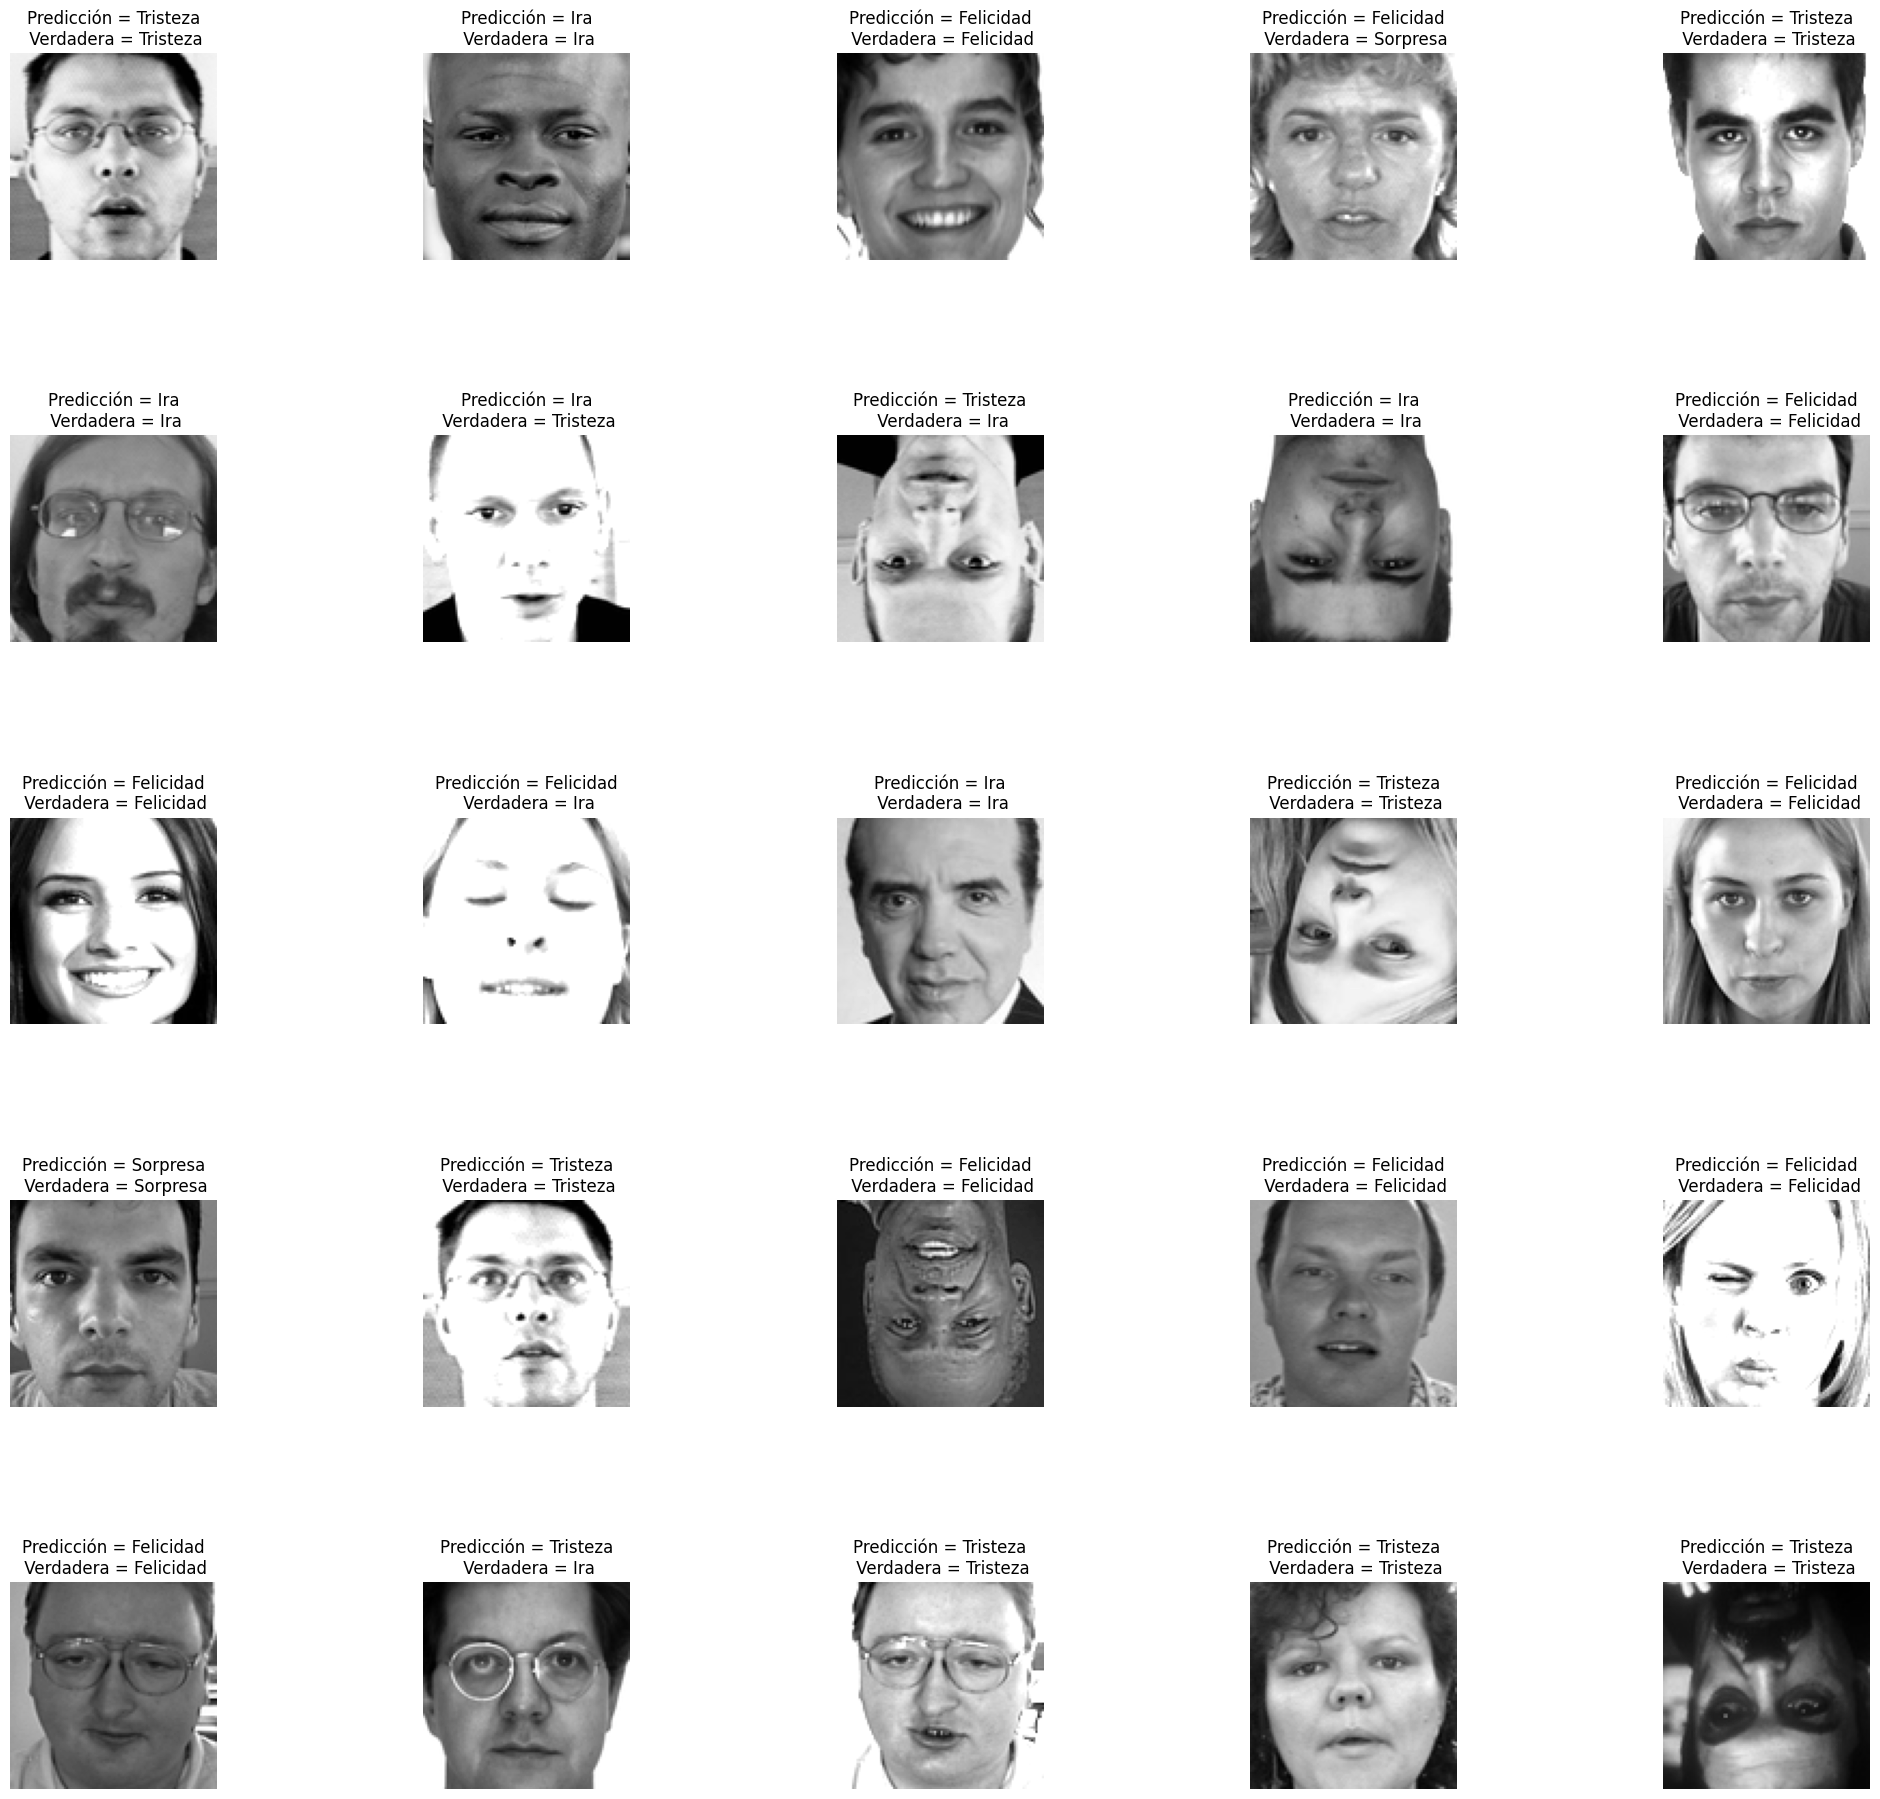

In [81]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (24, 24))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(96,96), cmap = 'gray')
    axes[i].set_title('Predicción = {}\n Verdadera = {}'.format(label_to_text[predicted_classes[i]], label_to_text[y_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

In [82]:
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       263
           1       0.74      0.58      0.65        24
           2       0.83      0.82      0.83       309
           3       0.90      0.95      0.93       463
           4       0.95      0.84      0.89       170

    accuracy                           0.86      1229
   macro avg       0.83      0.79      0.81      1229
weighted avg       0.86      0.86      0.86      1229



In [83]:
def predict(X_test):

  # Hago la predicción con el modelo de puntos clave
  df_predict = model_1_facialKeyPoints.predict(X_test)

  # Hago la predicción con el modelo de emociones
  df_emotion = np.argmax(model_2_emotion.predict(X_test), axis=-1)

  # Redimensiono el array de (856,) a (856,1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)

  # Convierto las predicciones en un dataframe
  df_predict = pd.DataFrame(df_predict, columns= columns)

  # Añado la emoción al dataframe de predicciones
  df_predict['emotion'] = df_emotion

  return df_predict

In [84]:
df_predict = predict(X_test)

41/41 [==============================] - 7s 164ms/step


In [85]:
df_predict.head()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          65.429680          36.258049           30.726248   
1          69.145569          37.665157           29.136488   
2          67.213501          35.752300           27.988165   
3          67.791061          38.375404           28.788567   
4          65.802032          37.401226           30.467056   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.184380                60.153210                36.796040   
1           38.512115                60.384956                38.814312   
2           37.821236                59.242447                36.906708   
3           38.270519                61.201485                38.861286   
4           38.795135                57.386482                38.877502   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                71.065323                36.991192                 36.239372   
1                77.133942                38.745193                 37.047634   
2                75.841896                35.854088                 35.858036   
3                74.021690                39.080936                 34.909023   
4                74.450058                38.000492                 38.259407   

   right_eye_inner_corner_y  ...  nose_tip_y  mouth_left_corner_x  \
0                 36.549503  ...   49.828384            62.463875   
1                 39.243393  ...   55.526939            67.065529   
2                 37.958069  ...   60.812763            69.937134   
3                 38.506378  ...   56.605354            64.124542   
4                 39.366913  ...   60.669228            64.157806   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            74.221603             37.140453             74.938499   
1            78.684074             30.155355             79.300934   
2            73.281433             28.336164             75.429207   
3            77.075409             33.616360             77.560081   
4            80.171440             34.980629             81.430847   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               49.507565               67.239799                  49.762520   
1               47.979126               77.377258                  48.075798   
2               48.679325               73.193474                  49.113220   
3               48.665218               72.425156                  48.786003   
4               48.474537               77.721268                  49.084991   

   mouth_center_bottom_lip_y  emotion  
0                  82.261162        2  
1                  80.634575        2  
2                  87.810387        3  
3                  86.508263        2  
4                  87.114632        2  

[5 rows x 31 columns]

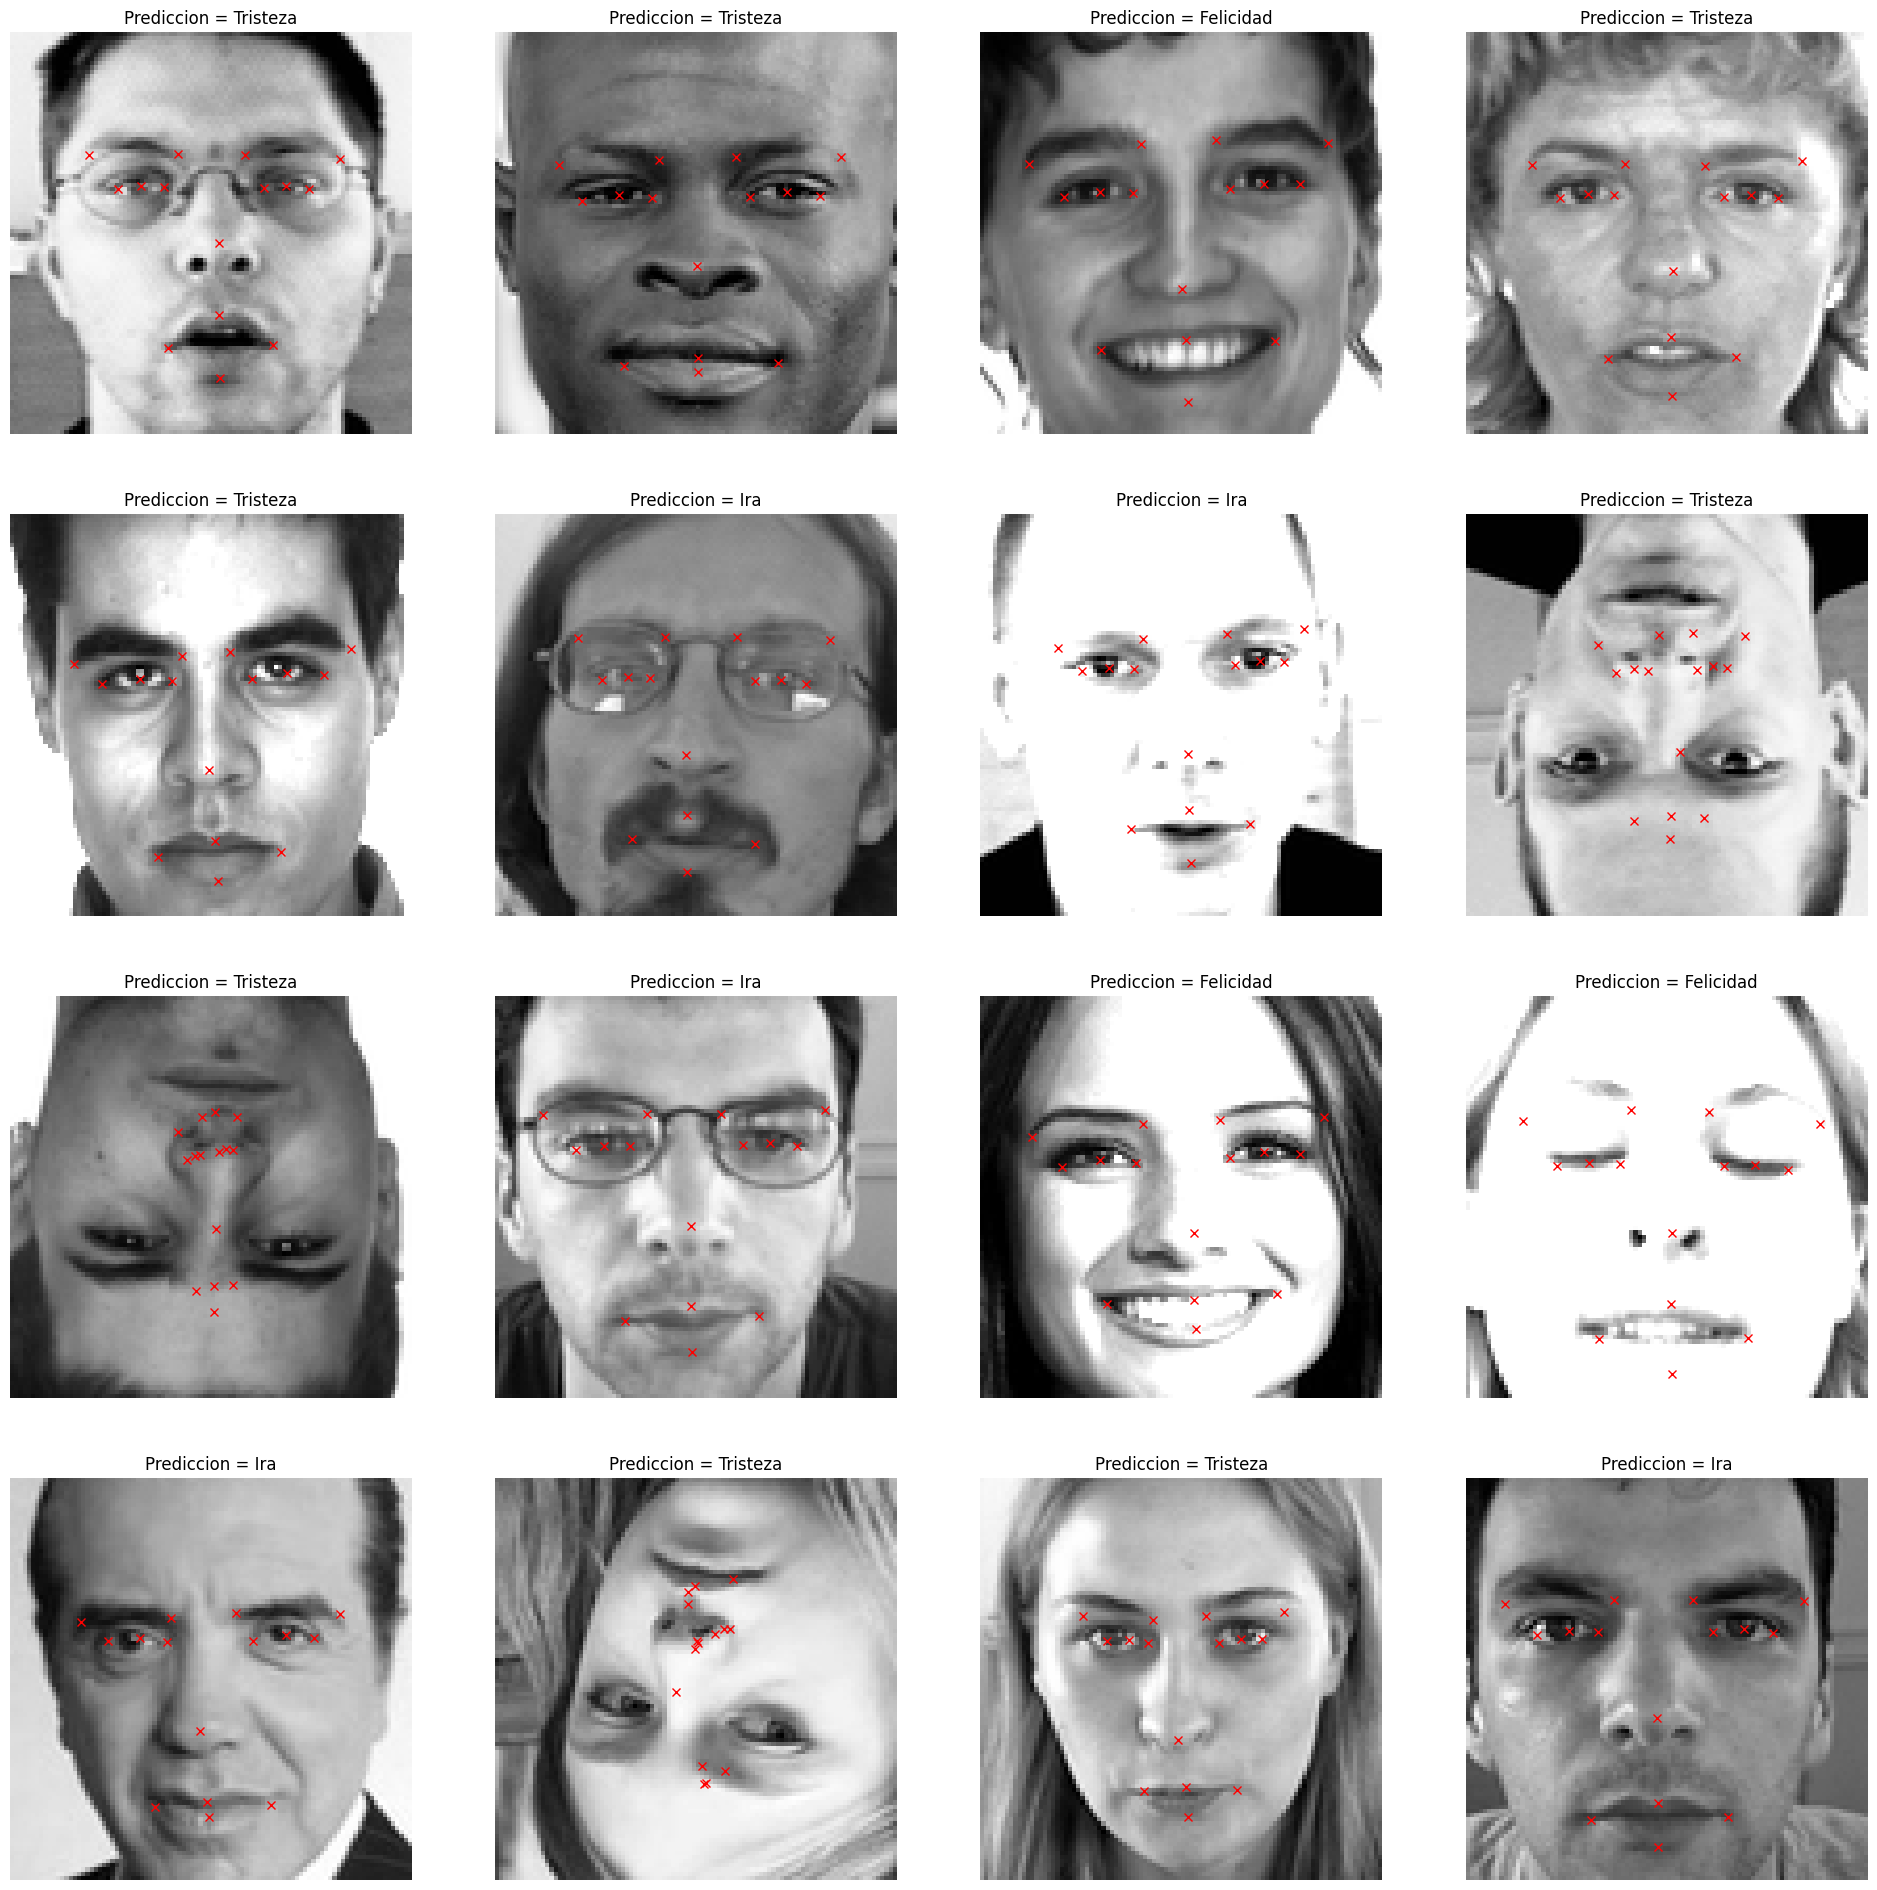

In [86]:
# Represento las imágenes de test junto con los puntos clave y emociones

fig, axes = plt.subplots(4, 4, figsize = (24, 24))
axes = axes.ravel()

for i in range(16):

    axes[i].imshow(X_test[i].squeeze(),cmap='gray')
    axes[i].set_title('Prediccion = {}'.format(label_to_text[df_predict['emotion'][i]]))
    axes[i].axis('off')
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')

Despliegue

In [87]:
import json

def deploy(directory, model):
  MODEL_DIR = directory
  version = 1

  # Junto el directorio del temp model con la versión elegida
  # El resultado será = '\tmp\version number'
  export_path = os.path.join(MODEL_DIR, str(version))
  print('export_path = {}\n'.format(export_path))

  # Guardo el modelo con saved_model.save
  # Si el directorio existe, debo borrarlo con '!rm'
  # rm elimina cada fichero especificado usando la consola de comandos.

  if os.path.isdir(export_path):
    print('\nAlready saved a model, cleaning up\n')
    !rm -r {export_path}

  tf.saved_model.save(model, export_path)

  os.environ["MODEL_DIR"] = MODEL_DIR

In [88]:
# Agreguego el paquete tensorflow-model-server a la lista de paquetes
!echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | tee /etc/apt/sources.list.d/tensorflow-serving.list && \
curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | apt-key add -
!apt update

deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0Warning: apt-key is deprecated. Manage keyring files in trusted.gpg.d instead (see apt-key(8)).
100  2943  100  2943    0     0   5895      0 --:--:-- --:--:-- --:--:--  5886
OK
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 http://storage.googleapis.com/tensorflow-serving-apt stable InRelease [3,026 B]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]


In [89]:
# Instalo tensorflow model server
!apt-get install tensorflow-model-server

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tensorflow-model-server
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 463 MB of archives.
After this operation, 0 B of additional disk space will be used.
Get:1 http://storage.googleapis.com/tensorflow-serving-apt stable/tensorflow-model-server amd64 tensorflow-model-server all 2.14.1 [463 MB]
Fetched 463 MB in 9s (54.3 MB/s)
Selecting previously unselected package tensorflow-model-server.
(Reading database ... 120882 files and directories currently installed.)
Preparing to unpack .../tensorflow-model-server_2.14.1_all.deb ...
Unpacking tensorflow-model-server (2.14.1) ...
Setting up tensorflow-model-server (2.14.1) ...


In [90]:
deploy('/model', model_1_facialKeyPoints)

export_path = /model/1



In [91]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=4500 \
  --model_name=keypoint_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

In [92]:
!tail server.log

In [93]:
deploy('/model1', model_2_emotion)

export_path = /model1/1



In [94]:
%%bash --bg
nohup tensorflow_model_server \
  --rest_api_port=4000 \
  --model_name=emotion_model \
  --model_base_path="${MODEL_DIR}" >server.log 2>&1

In [95]:
!tail server.log

In [96]:
import json

# Creo un objeto JSON y hago 3 predicciones
data = json.dumps({"signature_name": "serving_default", "instances": X_test[0:3].tolist()})
print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

Data: {"signature_name": "serving_default", "instances": ...  [1.0], [1.0], [1.0], [1.0], [1.0], [1.0], [1.0]]]]}


In [97]:
!pip install -q requests

In [98]:
import requests

# Función para hacer predicciones con el modelo publicado
def response(data):
  headers = {"content-type": "application/json"}
  json_response = requests.post('http://localhost:4500/v1/models/keypoint_model/versions/1:predict', data=data, headers=headers, verify = False)
  df_predict = json.loads(json_response.text)['predictions']
  json_response = requests.post('http://localhost:4000/v1/models/emotion_model/versions/1:predict', data=data, headers=headers, verify = False)
  df_emotion = np.argmax(json.loads(json_response.text)['predictions'], axis = 1)

  # Redimensión de (856,) a (856,1)
  df_emotion = np.expand_dims(df_emotion, axis = 1)

  # Convierto las predicciones en un dataframe
  df_predict= pd.DataFrame(df_predict, columns = columns)

  # Añado la emoción al dataframe de predicciones
  df_predict['emotion'] = df_emotion

  return df_predict

In [99]:
# Hacer una predicción
df_predict = response(data)

In [100]:
df_predict

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
0          65.429680          36.258049           30.726248   
1          69.145577          37.665154           29.136492   
2          67.213500          35.752296           27.988165   

   right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
0           36.184372                60.153200                36.796040   
1           38.512119                60.384956                38.814320   
2           37.821232                59.242443                36.906708   

   left_eye_outer_corner_x  left_eye_outer_corner_y  right_eye_inner_corner_x  \
0                71.065323                36.991188                 36.239376   
1                77.133957                38.745200                 37.047642   
2                75.841896                35.854092                 35.858032   

   right_eye_inner_corner_y  ...  nose_tip_y  mouth_left_corner_x  \
0                 36.549503  ...   49.828381            62.463871   
1                 39.243397  ...   55.526932            67.065529   
2                 37.958069  ...   60.812763            69.937118   

   mouth_left_corner_y  mouth_right_corner_x  mouth_right_corner_y  \
0            74.221596             37.140453             74.938500   
1            78.684059             30.155355             79.300934   
2            73.281433             28.336163             75.429207   

   mouth_center_top_lip_x  mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
0               49.507576               67.239800                  49.762524   
1               47.979130               77.377258                  48.075790   
2               48.679321               73.193474                  49.113220   

   mouth_center_bottom_lip_y  emotion  
0                  82.261162        2  
1                  80.634575        2  
2                  87.810400        3  

[3 rows x 31 columns]

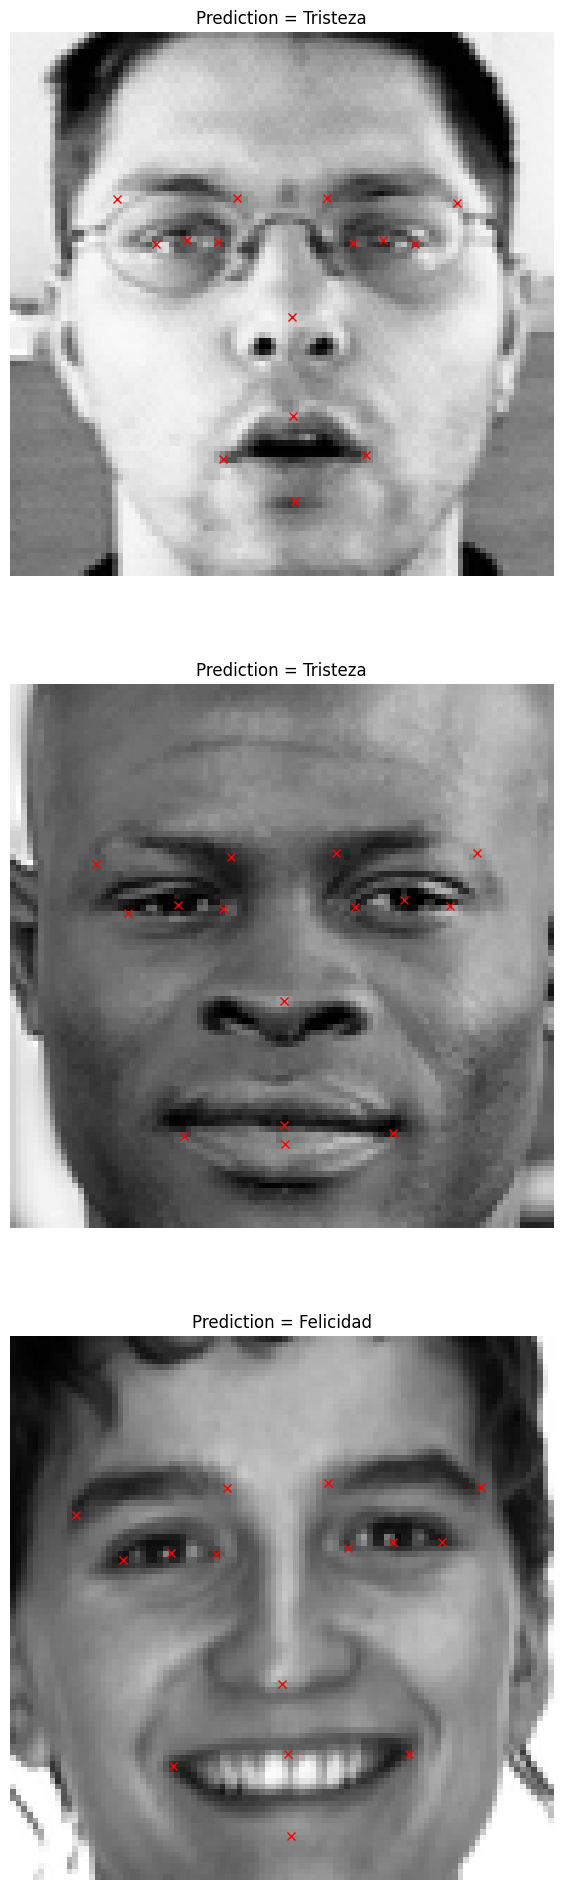

In [101]:
# Representar las imágenes de test y sus predicciones de puntos clave y emociones

fig, axes = plt.subplots(3, 1, figsize = (24, 24))
axes = axes.ravel()

for i in range(3):

    axes[i].imshow(X_test[i].squeeze(),cmap='gray')
    axes[i].set_title('Prediction = {}'.format(label_to_text[df_predict['emotion'][i]]))
    axes[i].axis('off')
    for j in range(1,31,2):
            axes[i].plot(df_predict.loc[i][j-1], df_predict.loc[i][j], 'rx')


In [102]:
keyfacial_df.describe()

left_eye_center_x  left_eye_center_y  right_eye_center_x  \
count        2140.000000        2140.000000         2140.000000   
mean           66.221549          36.842274           29.640269   
std             2.087683           2.294027            2.051575   
min            47.835757          23.832996           18.922611   
25%            65.046300          35.468842           28.472224   
50%            66.129065          36.913319           29.655440   
75%            67.332093          38.286438           30.858673   
max            78.013082          46.132421           42.495172   

       right_eye_center_y  left_eye_inner_corner_x  left_eye_inner_corner_y  \
count         2140.000000              2140.000000              2140.000000   
mean            37.063815                59.272128                37.856014   
std              2.234334                 2.005631                 2.034500   
min             24.773072                41.779381                27.190098   
25%             35.818377                58.113054                36.607950   
50%             37.048085                59.327154                37.845220   
75%             38.333884                60.521492                39.195431   
max             45.980981                69.023030                47.190316   

       left_eye_outer_corner_x  left_eye_outer_corner_y  \
count              2140.000000              2140.000000   
mean                 73.412473                37.640110   
std                   2.701639                 2.684162   
min                  52.947144                26.250023   
25%                  71.741978                36.102409   
50%                  73.240045                37.624207   
75%                  74.978684                39.308331   
max                  87.032252                49.653825   

       right_eye_inner_corner_x  right_eye_inner_corner_y  ...   nose_tip_x  \
count               2140.000000               2140.000000  ...  2140.000000   
mean                  36.603107                 37.920852  ...    47.952141   
std                    1.822784                  2.009505  ...     3.276053   
min                   24.112624                 26.250023  ...    24.472590   
25%                   35.495730                 36.766783  ...    46.495330   
50%                   36.620735                 37.920336  ...    47.900511   
75%                   37.665280                 39.143921  ...    49.260657   
max                   47.293746                 44.887301  ...    65.279654   

        nose_tip_y  mouth_left_corner_x  mouth_left_corner_y  \
count  2140.000000          2140.000000          2140.000000   
mean     57.253926            63.419076            75.887660   
std       4.528635             3.650131             4.438565   
min      41.558400            43.869480            57.023258   
25%      54.466000            61.341291            72.874263   
50%      57.638582            63.199057            75.682465   
75%      60.303524            65.302398            78.774969   
max      75.992731            84.767123            94.673637   

       mouth_right_corner_x  mouth_right_corner_y  mouth_center_top_lip_x  \
count           2140.000000           2140.000000             2140.000000   
mean              32.967365             76.134065               48.081325   
std                3.595103              4.259514                2.723274   
min                9.778137             56.690208               32.260312   
25%               30.879288             73.280038               46.580004   
50%               33.034022             75.941985               47.939031   
75%               35.063575             78.884031               49.290000   
max               50.973348             93.443176               61.804506   

       mouth_center_top_lip_y  mouth_center_bottom_lip_x  \
count             2140.000000                2140.000000   
mean                72.681125                  48.149654

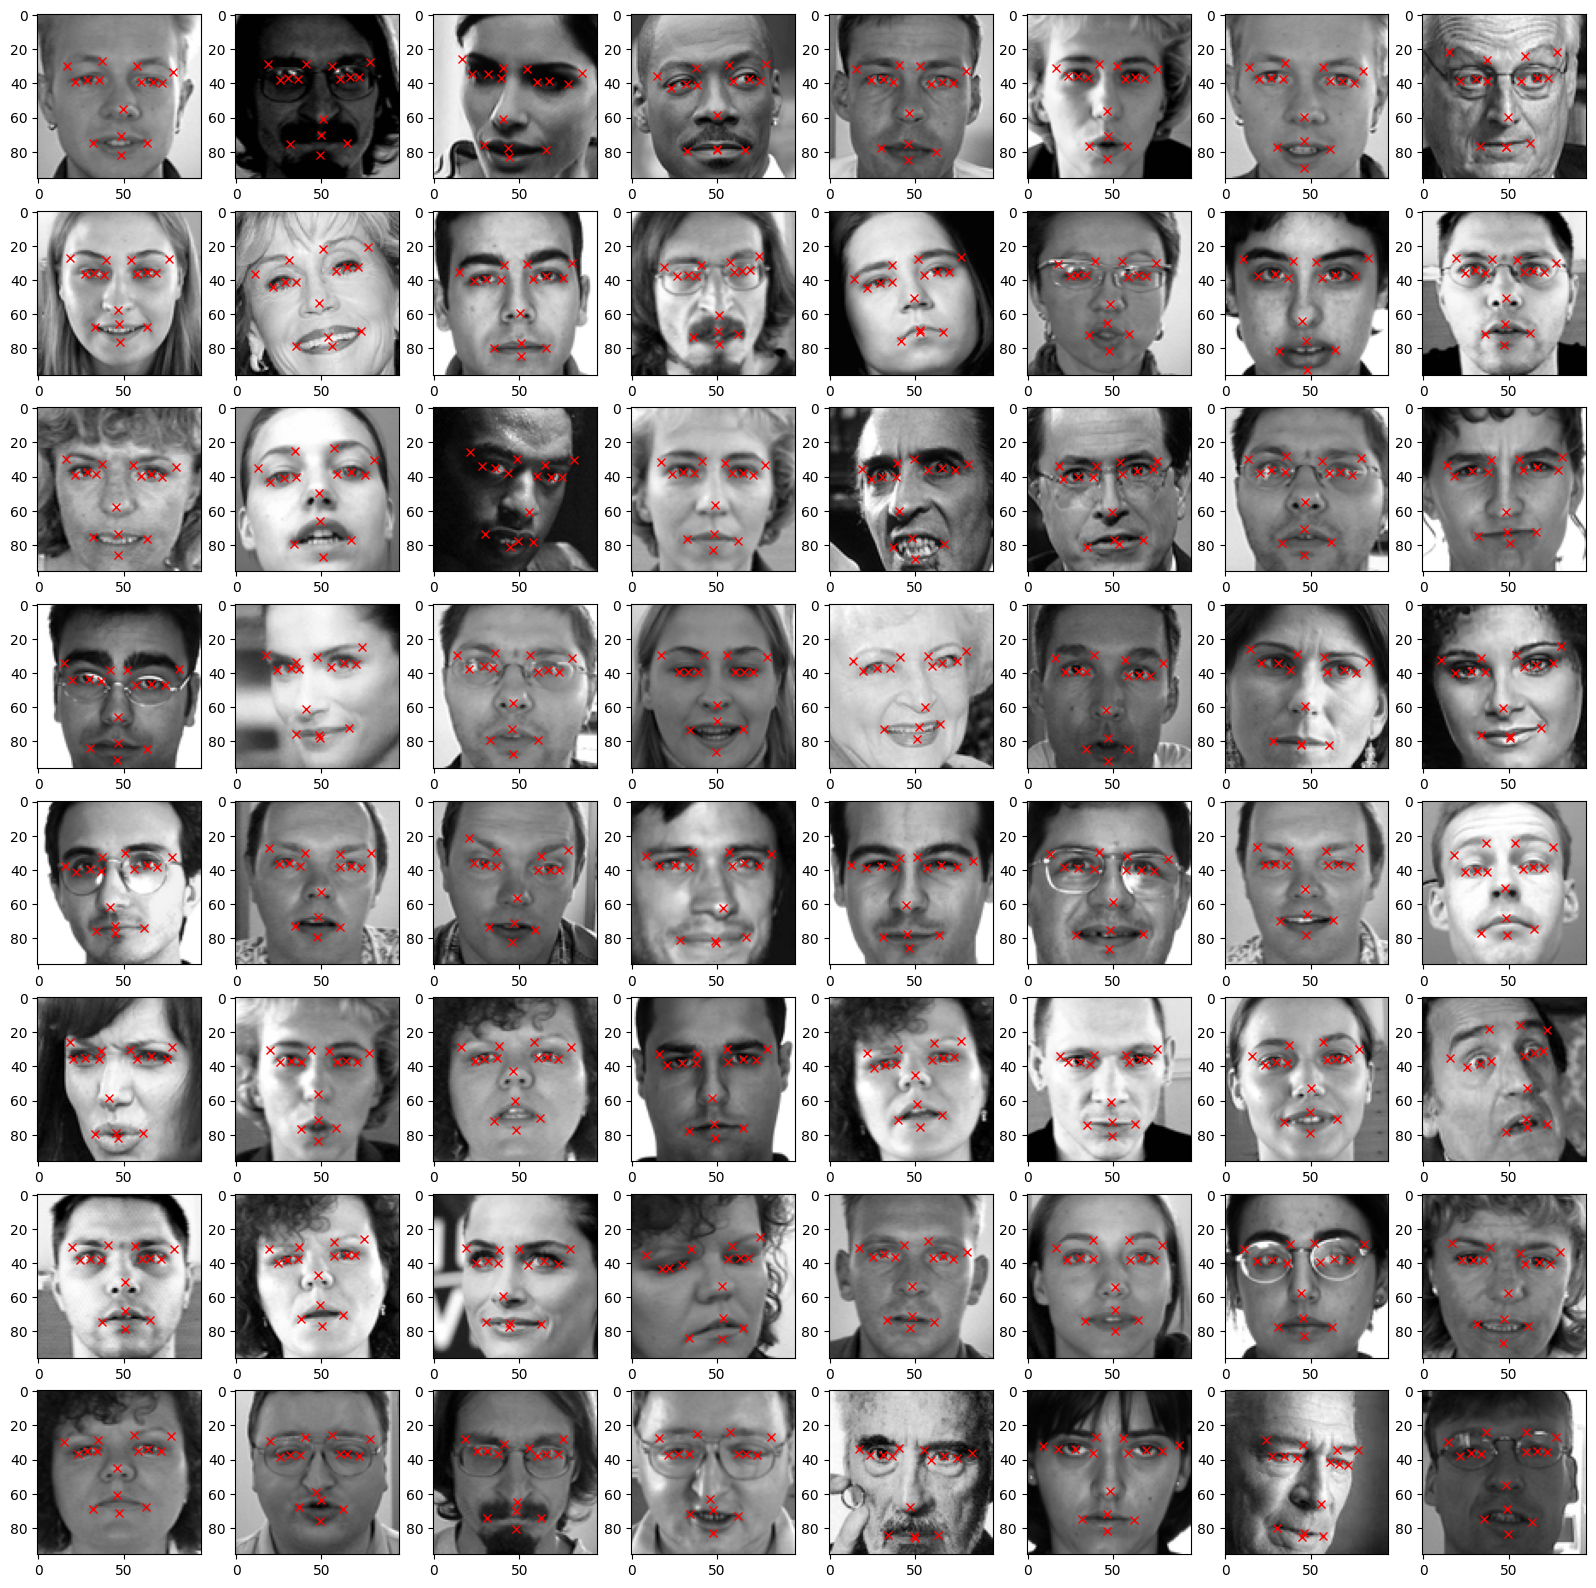

In [103]:
import random
# Veo más imágenes en formato matricial
fig = plt.figure(figsize=(20, 20))

for i in range(64):
    tf.keras.backend = random.randint(1, len(keyfacial_df))
    ax = fig.add_subplot(8, 8, i + 1)
    image = plt.imshow(keyfacial_df['Image'][tf.keras.backend],cmap = 'gray')
    for j in range(1,31,2):
        plt.plot(keyfacial_df.loc[tf.keras.backend][j-1], keyfacial_df.loc[tf.keras.backend][j], 'rx')

In [104]:
keyfacial_df_copy = copy.copy(keyfacial_df)

# Volteo las imágenes alrededor del eje x
keyfacial_df_copy['Image'] = keyfacial_df_copy['Image'].apply(lambda x: np.flip(x, axis = 0))

# Como volteamos verticalmente las coordenadas, los valores de x se quedan igual
for i in range(len(columns)):
  if i%2 == 1:
    keyfacial_df_copy[columns[i]] = keyfacial_df_copy[columns[i]].apply(lambda x: 96. - float(x) )

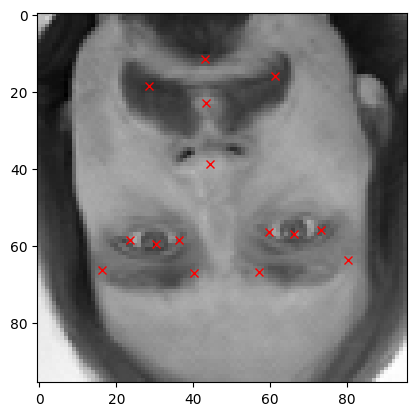

In [105]:
# Mostrar la imágen volteada verticalmente
plt.imshow(keyfacial_df_copy['Image'][0],cmap='gray')
for j in range(1, 31, 2):
        plt.plot(keyfacial_df_copy.loc[0][j-1], keyfacial_df_copy.loc[0][j], 'rx')

In [106]:
print('Tamaño de entrenamiento =', X_train.shape)
print('Tamaño de test =', X_test.shape)

Tamaño de entrenamiento = (22111, 96, 96, 1)
Tamaño de test = (1284, 96, 96, 1)


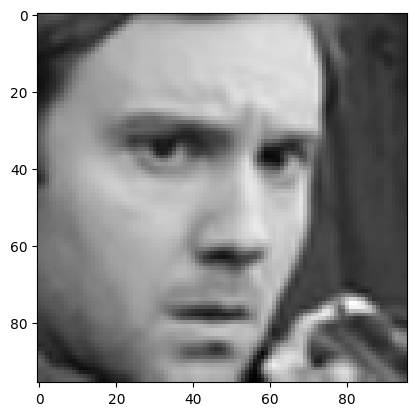

In [107]:
plt.imshow(facialexpression_df[' pixels'][0], cmap = 'gray')

Text(0.5, 1.0, 'Número de imágenes por emoción')

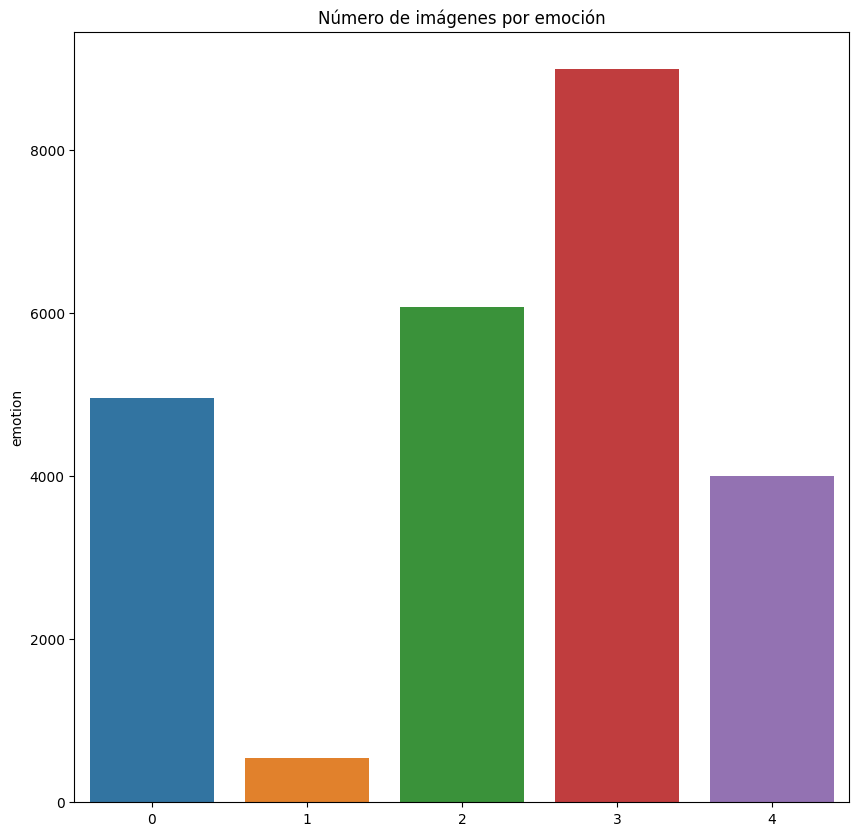

In [108]:
plt.figure(figsize=(10,10))
sns.barplot(x = facialexpression_df.emotion.value_counts().index, y = facialexpression_df.emotion.value_counts() )
plt.title('Número de imágenes por emoción')

In [109]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.1,
    zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    brightness_range = [1.1, 1.5],
    fill_mode = "nearest")

# Fíjate que "Brightness_range"
# 1.0 no afecta al brillo de la imagen
# números más pequeños que 1.0 oscurecen la imagen [0.5, 1.0]
# números más grandes que 1.0 iluminan la imagen [1.0, 1.5]

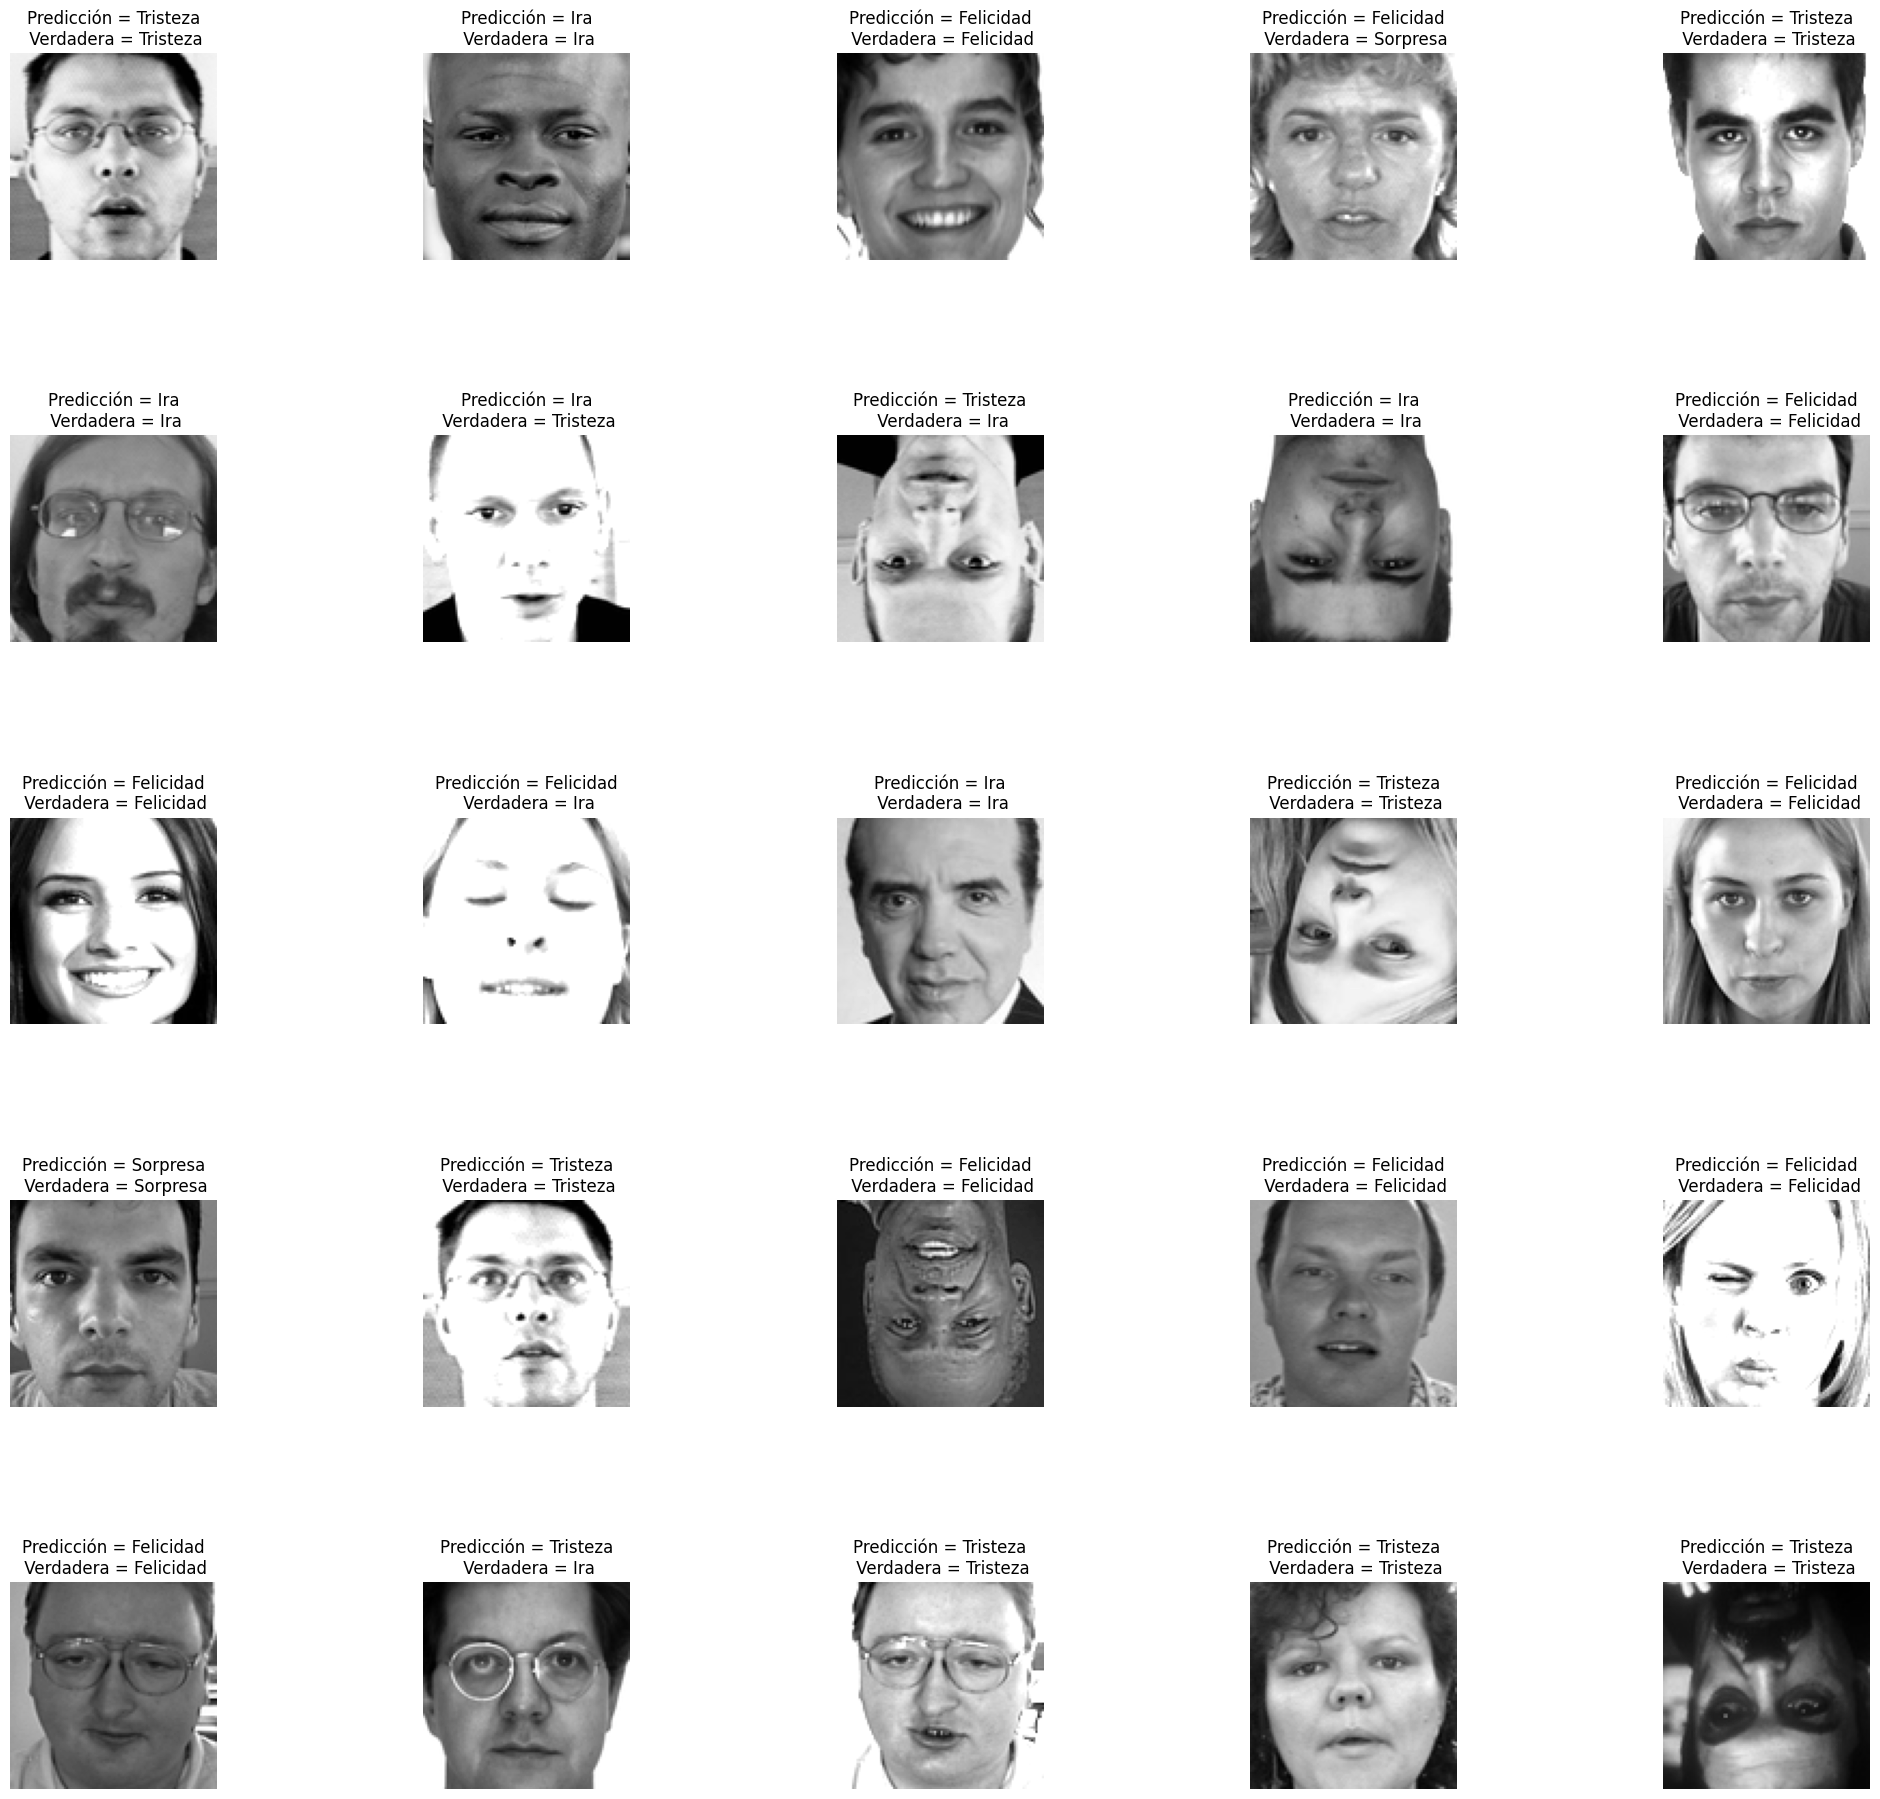

In [110]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (24, 24))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i].reshape(96,96), cmap = 'gray')
    axes[i].set_title('Predicción = {}\n Verdadera = {}'.format(label_to_text[predicted_classes[i]], label_to_text[y_true[i]]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_true, predicted_classes))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       263
           1       0.74      0.58      0.65        24
           2       0.83      0.82      0.83       309
           3       0.90      0.95      0.93       463
           4       0.95      0.84      0.89       170

    accuracy                           0.86      1229
   macro avg       0.83      0.79      0.81      1229
weighted avg       0.86      0.86      0.86      1229

